In [51]:
%load_ext autoreload
%autoreload 2
from covid_constants_and_util import *
from disease_model import * 
import helper_methods_for_aggregate_data_analysis as helper
from model_experiments import *
from model_results import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker as tick
from collections import Counter 
import datetime
from scipy.stats import linregress 
import os
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# General set-up

In [5]:
top_categories = get_list_of_poi_subcategories_with_most_visits(n_poi_categories=20)
pretty_top_categories = [SUBCATEGORIES_TO_PRETTY_NAMES[cat] if cat in SUBCATEGORIES_TO_PRETTY_NAMES else cat for cat in top_categories]

Reading chunk 0 from /dfs/scratch1/safegraph_homes/all_aggregate_data/chunks_with_demographic_annotations/chunk_1.2017-3.2020_c2.h5
Dates range from 2019-01-01 00:00:00 to 2020-05-02 00:00:00
Loaded chunk 0 in 19.327 seconds
Reading chunk 1 from /dfs/scratch1/safegraph_homes/all_aggregate_data/chunks_with_demographic_annotations/chunk_1.2017-3.2020_c2.h5
Dates range from 2019-01-01 00:00:00 to 2020-05-02 00:00:00
Loaded chunk 1 in 18.508 seconds
Reading chunk 2 from /dfs/scratch1/safegraph_homes/all_aggregate_data/chunks_with_demographic_annotations/chunk_1.2017-3.2020_c2.h5
Dates range from 2019-01-01 00:00:00 to 2020-05-02 00:00:00
Loaded chunk 2 in 19.805 seconds
Reading chunk 3 from /dfs/scratch1/safegraph_homes/all_aggregate_data/chunks_with_demographic_annotations/chunk_1.2017-3.2020_c2.h5
Dates range from 2019-01-01 00:00:00 to 2020-05-02 00:00:00
Loaded chunk 3 in 19.143 seconds
Reading chunk 4 from /dfs/scratch1/safegraph_homes/all_aggregate_data/chunks_with_demographic_annota

In [6]:
# reloads poi_and_cbg_characteristics
f = open(PATH_TO_SAVED_CHARACTERISTICS, 'rb')
poi_and_cbg_characteristics = pickle.load(f)
f.close()
print(poi_and_cbg_characteristics.keys())
print(poi_and_cbg_characteristics[HIGHLIGHT_MSA].keys())

dict_keys(['Atlanta_Sandy_Springs_Roswell_GA', 'Chicago_Naperville_Elgin_IL_IN_WI', 'Dallas_Fort_Worth_Arlington_TX', 'Houston_The_Woodlands_Sugar_Land_TX', 'Los_Angeles_Long_Beach_Anaheim_CA', 'Miami_Fort_Lauderdale_West_Palm_Beach_FL', 'New_York_Newark_Jersey_City_NY_NJ_PA', 'Philadelphia_Camden_Wilmington_PA_NJ_DE_MD', 'San_Francisco_Oakland_Hayward_CA', 'Washington_Arlington_Alexandria_DC_VA_MD_WV'])
dict_keys(['poi_categories', 'poi_areas', 'poi_dwell_times', 'poi_dwell_time_correction_factors', 'cbg_idx_groups_to_track', 'cbg_sizes'])


In [7]:
for msa_name in poi_and_cbg_characteristics.keys():
    print(msa_name)
    fn = get_ipf_filename(msa_name, MIN_DATETIME, MAX_DATETIME, True, True)
    print(fn)
    f = open(fn, 'rb')
    poi_cbg_visits_list = pickle.load(f)
    f.close()
    poi_and_cbg_characteristics[msa_name]['poi_cbg_visits_list'] = poi_cbg_visits_list

Atlanta_Sandy_Springs_Roswell_GA
/dfs/scratch1/safegraph_homes/all_aggregate_data/ipf_output/Atlanta_Sandy_Springs_Roswell_GA_2020-03-01_to_2020-05-02_clip_visits_True_correct_visits_True.pkl
Chicago_Naperville_Elgin_IL_IN_WI
/dfs/scratch1/safegraph_homes/all_aggregate_data/ipf_output/Chicago_Naperville_Elgin_IL_IN_WI_2020-03-01_to_2020-05-02_clip_visits_True_correct_visits_True.pkl
Dallas_Fort_Worth_Arlington_TX
/dfs/scratch1/safegraph_homes/all_aggregate_data/ipf_output/Dallas_Fort_Worth_Arlington_TX_2020-03-01_to_2020-05-02_clip_visits_True_correct_visits_True.pkl
Houston_The_Woodlands_Sugar_Land_TX
/dfs/scratch1/safegraph_homes/all_aggregate_data/ipf_output/Houston_The_Woodlands_Sugar_Land_TX_2020-03-01_to_2020-05-02_clip_visits_True_correct_visits_True.pkl
Los_Angeles_Long_Beach_Anaheim_CA
/dfs/scratch1/safegraph_homes/all_aggregate_data/ipf_output/Los_Angeles_Long_Beach_Anaheim_CA_2020-03-01_to_2020-05-02_clip_visits_True_correct_visits_True.pkl
Miami_Fort_Lauderdale_West_Palm_Be

# Extended Data Analyses 

## Distribution of POI infections over time

In [36]:
min_timestring = '2020_08_29'
models_df = evaluate_all_fitted_models_for_experiment('rerun_best_models_and_save_cases_per_poi', 
                                                              min_timestring=min_timestring)
models_df['MSA_name'] = models_df['data_kwargs'].map(lambda x:x['MSA_name'])
models_df['original_timestring'] = models_df['model_kwargs'].map(lambda x:x['model_quality_dict']['model_timestring'])
models_df['how_to_select_best_grid_search_models'] = models_df['model_kwargs'].map(lambda x:x['model_quality_dict']['how_to_select_best_grid_search_models'])

Loading models with timestrings between 2020_08_29 and 2020_10_30_12_09_11_955441
99399 files in directory /dfs/scratch2/second_safegraph_homes/extra_safegraph_aggregate_models/data_and_model_configs
Found 97 fitted models for rerun_best_models_and_save_cases_per_poi
Loaded 1 models so far: 0.005s -> 0.005s per model
Time to load and score all models: 0.366s -> 0.004s per model


In [65]:
msa_results_over_seeds = {}
for msa in MSAS:
    print(msa)
    msa_results_over_seeds[msa] = get_frac_infected_over_time_per_category(models_df, poi_and_cbg_characteristics, 
                                                                           msa, pretty_top_categories)

Atlanta_Sandy_Springs_Roswell_GA
Num params * seeds: 480
Chicago_Naperville_Elgin_IL_IN_WI
Num params * seeds: 120
Dallas_Fort_Worth_Arlington_TX
Num params * seeds: 150
Houston_The_Woodlands_Sugar_Land_TX
Num params * seeds: 240
Los_Angeles_Long_Beach_Anaheim_CA
Num params * seeds: 750
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Num params * seeds: 210
New_York_Newark_Jersey_City_NY_NJ_PA
Num params * seeds: 210
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD
Num params * seeds: 90
San_Francisco_Oakland_Hayward_CA
Num params * seeds: 150
Washington_Arlington_Alexandria_DC_VA_MD_WV
Num params * seeds: 510


In [66]:
# get the categories that contribute the most to infections over time
all_avg_props = []
all_min_props = []
for i, cat in enumerate(pretty_top_categories):
    keep_cat = True
    avg_prop_per_msas = []
    for msa in msa_results_over_seeds.keys():
        results_per_seed = msa_results_over_seeds[msa]
        prop_infections_over_seeds = []
        for s in range(len(results_per_seed)):
            frac_infected = results_per_seed[s][0][i]  # fraction of population infected at this cat per day
            total_frac_infected = results_per_seed[s][1]  # total fraction of population infected at POIs per day
            prop_infections = np.sum(frac_infected) / np.sum(total_frac_infected)  # proportion of all POI infections
            prop_infections_over_seeds.append(prop_infections)
        avg_prop = np.mean(prop_infections_over_seeds)  # avg proportion over seeds
        avg_prop_per_msas.append(avg_prop)
    all_avg_props.append(np.mean(avg_prop_per_msas))
    all_min_props.append(np.min(avg_prop_per_msas))

order = np.argsort(-1 * np.array(all_avg_props))
for i in order:
    cat, avg_prop, min_prop = pretty_top_categories[i], all_avg_props[i], all_min_props[i]
    print('%s: mean over MSAs = %.2f%%, min over MSAs = %.2f%%' % (cat, 100.* avg_prop, 100.* min_prop))
cats_to_plot = [pretty_top_categories[i] for i in order[:7]]
print('Final list of cats to plot', cats_to_plot)

Full-Service Restaurants: mean over MSAs = 17.36%, min over MSAs = 7.27%
Hotels & Motels: mean over MSAs = 5.66%, min over MSAs = 0.72%
Religious Organizations: mean over MSAs = 3.36%, min over MSAs = 1.60%
Offices of Physicians: mean over MSAs = 3.34%, min over MSAs = 1.32%
Cafes & Snack Bars: mean over MSAs = 3.16%, min over MSAs = 1.80%
Fitness Centers: mean over MSAs = 3.05%, min over MSAs = 0.93%
Grocery Stores: mean over MSAs = 2.94%, min over MSAs = 1.30%
Limited-Service Restaurants: mean over MSAs = 2.52%, min over MSAs = 0.71%
Hardware Stores: mean over MSAs = 2.21%, min over MSAs = 1.05%
Other General Stores: mean over MSAs = 0.76%, min over MSAs = 0.23%
Sporting Goods Stores: mean over MSAs = 0.64%, min over MSAs = 0.20%
Pet Stores: mean over MSAs = 0.60%, min over MSAs = 0.15%
Automotive Parts Stores: mean over MSAs = 0.52%, min over MSAs = 0.11%
Used Merchandise Stores: mean over MSAs = 0.51%, min over MSAs = 0.17%
Gas Stations: mean over MSAs = 0.35%, min over MSAs = 0.08

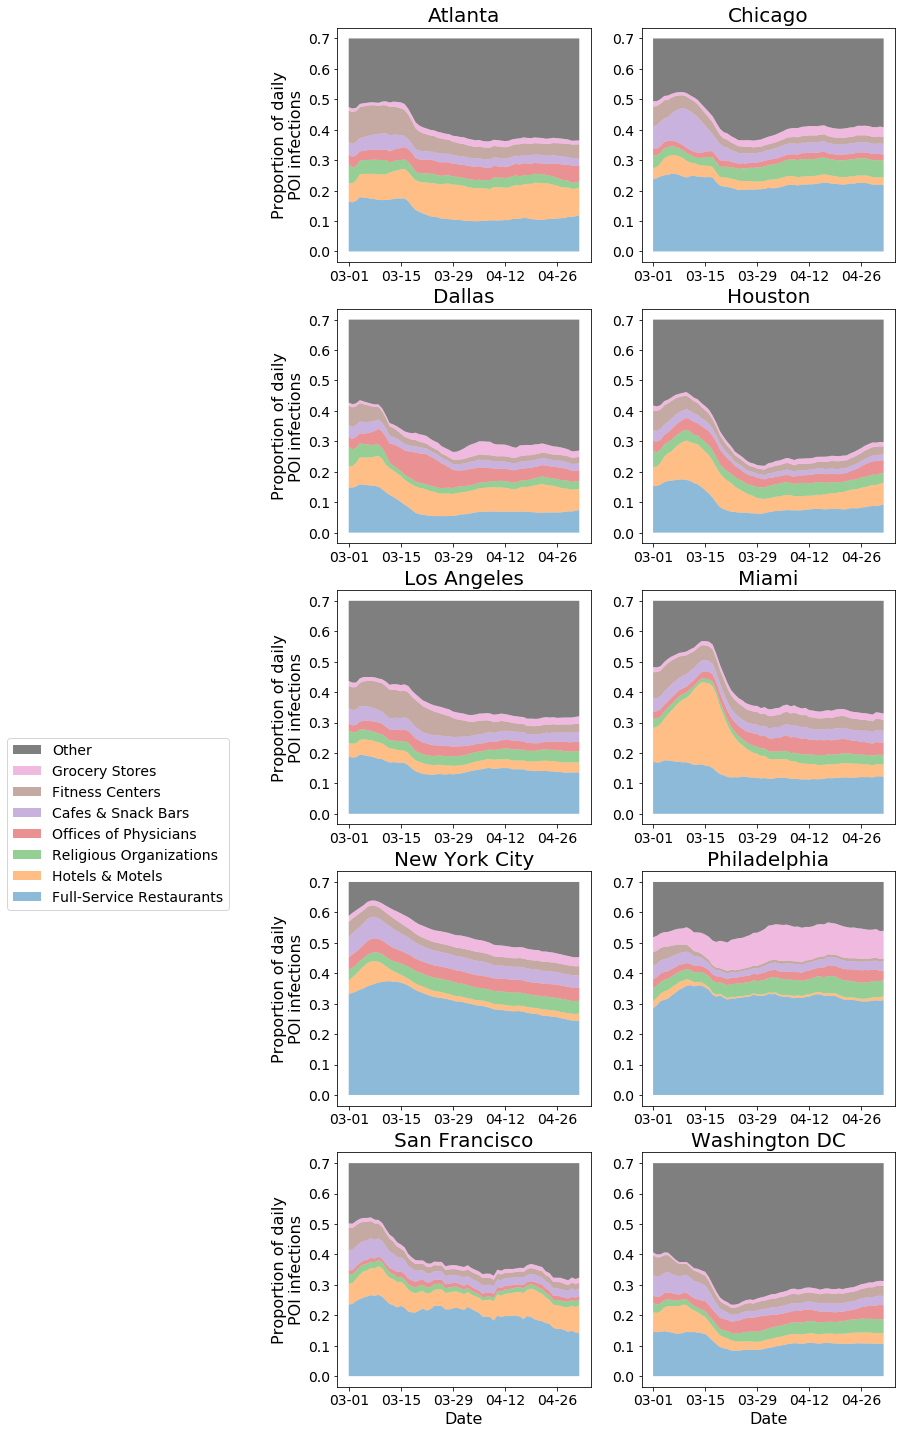

In [68]:
fig, axes = plt.subplots(5, 2, figsize=(10, 25))
axes = [ax for axes_row in axes for ax in axes_row]
for i, (ax, msa) in enumerate(list(zip(axes, MSAS))):
    results_per_seed = msa_results_over_seeds[msa]
    plot_stacked_infection_proportions_over_categories(results_per_seed, pretty_top_categories,
                                                       cats_to_plot, msa, ax, y_max=0.7)
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(-0.4, -2), fontsize=14)
    if i < 8:
        ax.set_xlabel('')
    if (i % 2) == 1:
        ax.set_ylabel('')

## Data summary table

In [76]:
msa_stats = []
for msa in MSAS:
    print(msa)
    msa_df = models_df[models_df['MSA_name'] == msa]
    mdl, data_and_model_kwargs, _, _, _ = load_model_and_data_from_timestring(
                msa_df.iloc[0]['timestring'],
                load_fast_results_only=False, 
                load_full_model=True)    
    nyt_outcomes, nyt_counties, nyt_cbgs, msa_counties, msa_cbgs = get_variables_for_evaluating_msa_model(msa)
    msa_cbgs = set(msa_cbgs)
    cbgs_in_msa = np.array([a in msa_cbgs for a in mdl.ALL_UNIQUE_CBGS])

    poi_cbg_list = pickle.load(open(data_and_model_kwargs['model_kwargs']['preload_poi_visits_list_filename'], 'rb'))
    n_pois, n_cbgs = poi_cbg_list[0].shape
    total_nnzs = 0
    total_visits = 0
    correction_factor = 322903030/46554310. # hard-coded from the known correction factor
    for i in range(len(poi_cbg_list)):
        total_nnzs += poi_cbg_list[i].nnz 
        total_visits += poi_cbg_list[i].sum() / correction_factor
    msa_stats.append({'msa':MSAS_TO_PRETTY_NAMES[msa],
                     'n_pois':n_pois, 
                     'n_cbgs':n_cbgs, 
                      'total_hourly_edges':total_nnzs, 
                      'total_visits':np.round(total_visits).astype(int), 
                      'total_modelled_pop':mdl.CBG_SIZES.sum(), 
                      'total_modelled_pop_in_cbg':mdl.CBG_SIZES[cbgs_in_msa].sum()})
msa_stats = pd.DataFrame(msa_stats)
full_table = pd.concat([msa_stats, pd.DataFrame(msa_stats.sum()).transpose()])
full_table['msa'].iloc[-1] = 'All MSAs combined'

def millify(n):
    # https://stackoverflow.com/questions/3154460/python-human-readable-large-numbers
    millnames = ['',' thousand',' million',' billion',' trillion']
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.1f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

print("""We model hourly mobility networks in %i of the largest American metropolitan statistical areas (containing %s people), connecting %s Census Block Groups to %s points of interest, a total of %s hourly edges.""" % 
      (len(full_table) - 1, 
       millify(full_table['total_modelled_pop'].iloc[-1]), 
       "{:,}".format(full_table['n_cbgs'].iloc[-1]), 
       "{:,}".format(full_table['n_pois'].iloc[-1]), 
       millify(full_table['total_hourly_edges'].iloc[-1])))
       
full_table
       
      
             

Atlanta_Sandy_Springs_Roswell_GA
Chicago_Naperville_Elgin_IL_IN_WI
Dallas_Fort_Worth_Arlington_TX
Houston_The_Woodlands_Sugar_Land_TX
Los_Angeles_Long_Beach_Anaheim_CA
Miami_Fort_Lauderdale_West_Palm_Beach_FL
New_York_Newark_Jersey_City_NY_NJ_PA
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD
San_Francisco_Oakland_Hayward_CA
Washington_Arlington_Alexandria_DC_VA_MD_WV
We model hourly mobility networks in 10 of the largest American metropolitan statistical areas (containing 97.9 million people), connecting 56,945 Census Block Groups to 552,758 points of interest, a total of 5.4 billion hourly edges.


msa n_cbgs  n_pois total_hourly_edges total_modelled_pop  \
0            Atlanta   3130   39411          540166727            7455619   
1            Chicago   6812   62420          540112026           10169539   
2             Dallas   4877   52999          752998455            9353561   
3            Houston   3345   49622          609766288            7621541   
4        Los Angeles   8904   83954          643758979           16101274   
5              Miami   3555   40964          487544190            6833129   
6      New York City  14763  122428         1057789207           20729481   
7       Philadelphia   4565   37951          304697220            6759058   
8      San Francisco   2943   28713          161575167            5137800   
9      Washington DC   4051   34296          312620619            7740276   
0  All MSAs combined  56945  552758         5411028878           97901278   

  total_modelled_pop_in_cbg total_visits  
0                   5769705     27669692  
1                   9516306     33785702  
2                   7253213     37298053  
3                   6771951     32943613  
4                  13206546     38101674  
5                   6064648     26347947  
6                  19805272     66581080  
7                   6045293     19551138  
8                   4595143     10728090  
9                   6120026     17898324  
0                  85148103    310905313

# Sensitivity analyses

## 1. Time-varying base transmission rate

In [69]:
# load new models (with time-varying base transmission rate) after gridsearch
min_timestring = '2020_09_01'
home_proportion_beta_df = evaluate_all_fitted_models_for_experiment('grid_search_home_proportion_beta', 
                                                min_timestring=min_timestring)
home_proportion_beta_df['MSA_name'] = home_proportion_beta_df['data_kwargs'].map(lambda x:x['MSA_name'])

Loading models with timestrings between 2020_09_01 and 2020_10_30_13_28_46_789998
99399 files in directory /dfs/scratch2/second_safegraph_homes/extra_safegraph_aggregate_models/data_and_model_configs
Found 15000 fitted models for grid_search_home_proportion_beta
Loaded 1 models so far: 0.077s -> 0.077s per model
Loaded 1001 models so far: 50.284s -> 0.050s per model
Loaded 2001 models so far: 100.504s -> 0.050s per model
Loaded 3001 models so far: 162.117s -> 0.054s per model
Loaded 4001 models so far: 212.967s -> 0.053s per model
Loaded 5001 models so far: 262.742s -> 0.053s per model
Loaded 6001 models so far: 312.436s -> 0.052s per model
Loaded 7001 models so far: 361.832s -> 0.052s per model
Loaded 8001 models so far: 410.822s -> 0.051s per model
Loaded 9001 models so far: 459.610s -> 0.051s per model
Loaded 10001 models so far: 509.967s -> 0.051s per model
Loaded 11001 models so far: 558.910s -> 0.051s per model
Loaded 12001 models so far: 607.360s -> 0.051s per model
Loaded 13001

In [2]:
# load original models (without time-varying) base transmission rate
min_timestring = '2020_07_16_10_4'
max_timestring = '2020_07_18'
df = evaluate_all_fitted_models_for_experiment('normal_grid_search', 
                                                min_timestring=min_timestring,
                                                max_timestring=max_timestring)
df['MSA_name'] = df['data_kwargs'].map(lambda x:x['MSA_name'])
ablation_df = df.loc[df['poi_psi'] == 0].copy()
non_ablation_df = df.loc[df['poi_psi'] > 0].copy()
df = None

Loading models with timestrings between 2020_07_16_10_4 and 2020_07_18
99399 files in directory /dfs/scratch2/second_safegraph_homes/extra_safegraph_aggregate_models/data_and_model_configs
Found 17000 fitted models for normal_grid_search
Loaded 1 models so far: 0.012s -> 0.012s per model
Loaded 1001 models so far: 4.692s -> 0.005s per model
Loaded 2001 models so far: 8.351s -> 0.004s per model
Loaded 3001 models so far: 11.900s -> 0.004s per model
Loaded 4001 models so far: 15.694s -> 0.004s per model
Loaded 5001 models so far: 19.397s -> 0.004s per model
Loaded 6001 models so far: 22.862s -> 0.004s per model
Loaded 7001 models so far: 26.255s -> 0.004s per model
Loaded 8001 models so far: 30.146s -> 0.004s per model
Loaded 9001 models so far: 33.807s -> 0.004s per model
Loaded 10001 models so far: 37.443s -> 0.004s per model
Loaded 11001 models so far: 41.165s -> 0.004s per model
Loaded 12001 models so far: 44.835s -> 0.004s per model
Loaded 13001 models so far: 48.414s -> 0.004s per 

In [74]:
# compare to original on train/test fit 
version = 'daily'
metric = 'RMSE'
mode = 'cases'
train_key = 'train_loss_dict_%s_%s_%s' % (version, mode, metric)
test_key = 'test_loss_dict_%s_%s_%s' % (version, mode, metric)
train_df = get_best_models_for_all_msas(non_ablation_df, train_key, only_single_best=True)
train_base_df = get_best_models_for_all_msas(home_proportion_beta_df, train_key, only_single_best=True)
compare_best_models(train_base_df, train_df, test_key)

Finding best fit model based on key=train_loss_dict_daily_cases_RMSE, loss tolerance=1.200
Finding best fit model based on key=train_loss_dict_daily_cases_RMSE, loss tolerance=1.200
first has lower loss than second in 6 MSAs; failed on ['Chicago_Naperville_Elgin_IL_IN_WI' 'Dallas_Fort_Worth_Arlington_TX'
 'New_York_Newark_Jersey_City_NY_NJ_PA'
 'Philadelphia_Camden_Wilmington_PA_NJ_DE_MD']
avg ratio of first / second = 0.904
median ratio of first / second = 0.919


In [75]:
# compare to original on full fit
full_key = 'loss_dict_%s_%s_%s' % (version, mode, metric)
full_df = get_best_models_for_all_msas(non_ablation_df, full_key, only_single_best=True)
full_base_df = get_best_models_for_all_msas(home_proportion_beta_df, full_key, only_single_best=True)
compare_best_models(full_base_df, full_df, full_key)

Finding best fit model based on key=loss_dict_daily_cases_RMSE, loss tolerance=1.200
Finding best fit model based on key=loss_dict_daily_cases_RMSE, loss tolerance=1.200
first has lower loss than second in 8 MSAs; failed on ['Dallas_Fort_Worth_Arlington_TX'
 'Philadelphia_Camden_Wilmington_PA_NJ_DE_MD']
avg ratio of first / second = 0.978
median ratio of first / second = 0.980


Atlanta_Sandy_Springs_Roswell_GA
Found 28 best fit models within threshold for Atlanta
Chicago_Naperville_Elgin_IL_IN_WI
Found 11 best fit models within threshold for Chicago
Dallas_Fort_Worth_Arlington_TX
Found 13 best fit models within threshold for Dallas
Houston_The_Woodlands_Sugar_Land_TX
Found 14 best fit models within threshold for Houston
Los_Angeles_Long_Beach_Anaheim_CA
Found 26 best fit models within threshold for Los Angeles
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Found 12 best fit models within threshold for Miami
New_York_Newark_Jersey_City_NY_NJ_PA
Found 10 best fit models within threshold for New York City
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD
Found 10 best fit models within threshold for Philadelphia
San_Francisco_Oakland_Hayward_CA
Found 6 best fit models within threshold for San Francisco
Washington_Arlington_Alexandria_DC_VA_MD_WV
Found 18 best fit models within threshold for Washington DC


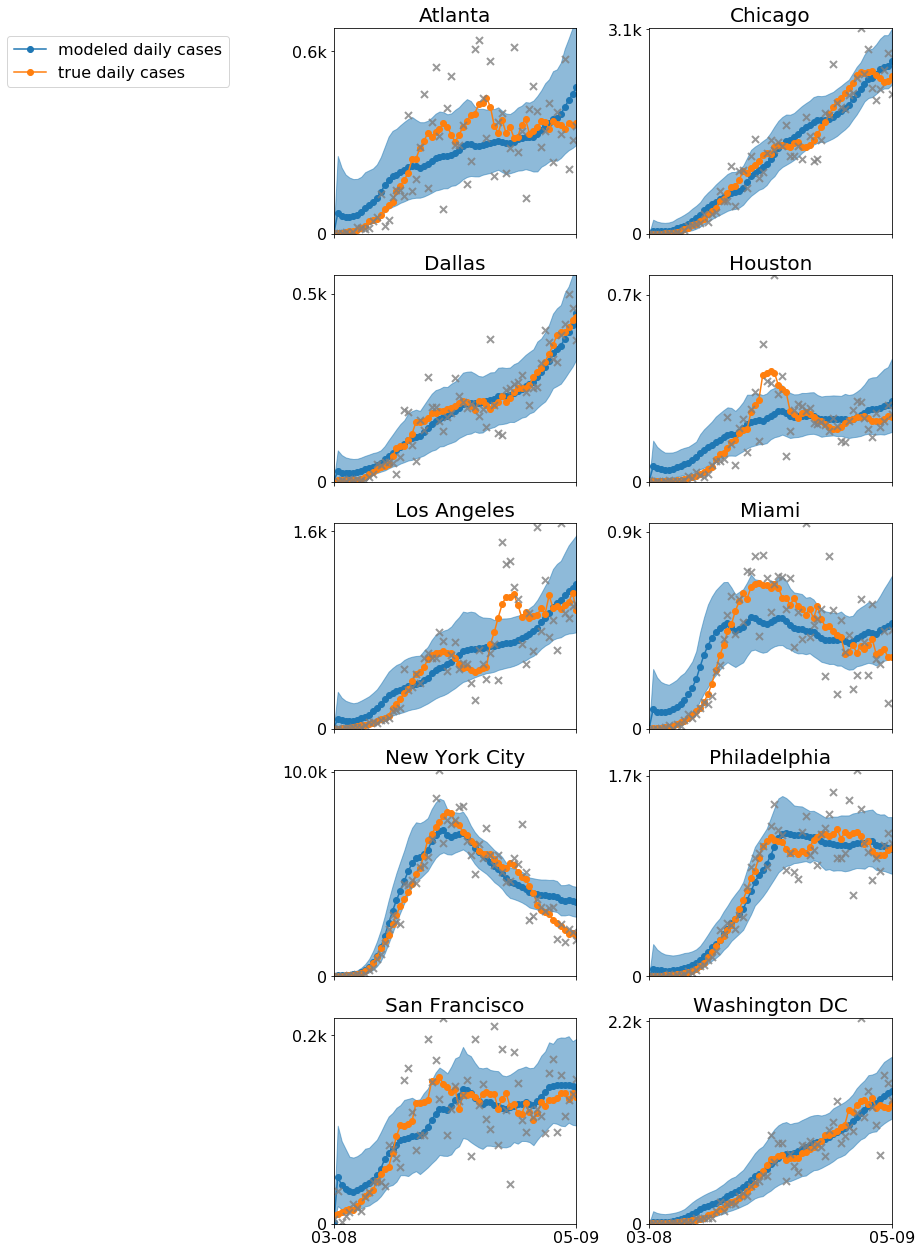

In [72]:
# full fit plots - home proportion beta
train_test_partition = None
key_to_sort_by = 'loss_dict_daily_cases_RMSE'
thing_to_plot, plot_daily_not_cumulative = 'cases', True
other_plotting_kwargs =  { 
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8),                                   
                      datetime.datetime(2020, 5, 9)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 9)],                                            
            'title_fontsize':20,
            'marker_size':6,
            'only_two_yticks':True,
            'real_data_color':'tab:orange',
            'model_color':'tab:blue',
            'plot_mode':thing_to_plot,
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'add_smoothed_real_data_line':True,
}

fig, axes = plt.subplots(5, 2, figsize=[10, 22], sharex=True)
fig.subplots_adjust(wspace=0.3)
axes = [ax for axes_row in axes for ax in axes_row]
for i, (msa, ax) in enumerate(zip(MSAS, axes)):
    print(msa)
    plot_best_models_fit_for_msa(home_proportion_beta_df, msa, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)
    if i == 0:
        ax.legend(bbox_to_anchor=(-0.4, 1), fontsize=16)

Atlanta_Sandy_Springs_Roswell_GA
Found 16 best fit models within threshold for Atlanta
Chicago_Naperville_Elgin_IL_IN_WI
Found 4 best fit models within threshold for Chicago
Dallas_Fort_Worth_Arlington_TX
Found 5 best fit models within threshold for Dallas
Houston_The_Woodlands_Sugar_Land_TX
Found 8 best fit models within threshold for Houston
Los_Angeles_Long_Beach_Anaheim_CA
Found 25 best fit models within threshold for Los Angeles
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Found 7 best fit models within threshold for Miami
New_York_Newark_Jersey_City_NY_NJ_PA
Found 7 best fit models within threshold for New York City
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD
Found 3 best fit models within threshold for Philadelphia
San_Francisco_Oakland_Hayward_CA
Found 5 best fit models within threshold for San Francisco
Washington_Arlington_Alexandria_DC_VA_MD_WV
Found 17 best fit models within threshold for Washington DC


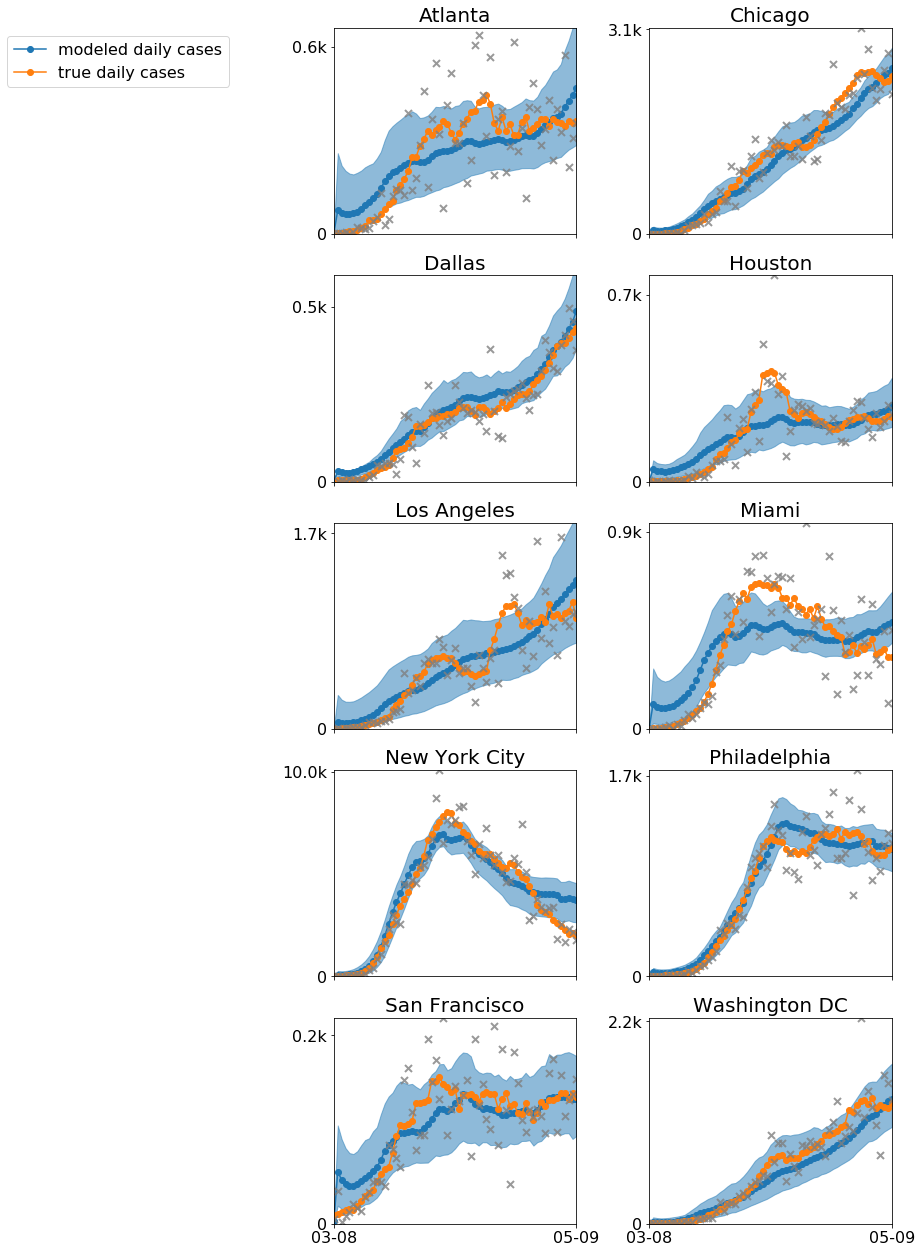

In [73]:
# full fit plots
train_test_partition = None
key_to_sort_by = 'loss_dict_daily_cases_RMSE'
thing_to_plot, plot_daily_not_cumulative = 'cases', True
other_plotting_kwargs =  { 
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8),                                   
                      datetime.datetime(2020, 5, 9)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 9)],                                            
            'title_fontsize':20,
            'marker_size':6,
            'only_two_yticks':True,
            'real_data_color':'tab:orange',
            'model_color':'tab:blue',
            'plot_mode':thing_to_plot,
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'add_smoothed_real_data_line':True,
}

fig, axes = plt.subplots(5, 2, figsize=[10, 22], sharex=True)
fig.subplots_adjust(wspace=0.3)
axes = [ax for axes_row in axes for ax in axes_row]
for i, (msa, ax) in enumerate(zip(MSAS, axes)):
    print(msa)
    plot_best_models_fit_for_msa(non_ablation_df, msa, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)
    if i == 0:
        ax.legend(bbox_to_anchor=(-0.4, 1), fontsize=16)

## 2. Modifying parameter form of POI transmission rate

### Based on Emanuel & Popescu ranking

In [8]:
# http://www.ezekielemanuel.com/writing/all-articles/2020/06/30/covid-19-activity-risk-levels 
EMANUEL_CATEGORY_TO_SCORE = {
    'Full-Service Restaurants':4,
    'Limited-Service Restaurants':3,  
    'Other General Stores':2, # retail
    'Gas Stations':0,
    'Fitness Centers':4,
    'Grocery Stores':2,
    'Cafes & Snack Bars':4,
    'Hotels & Motels':0,
    'Religious Organizations':5,
    'Hardware Stores':2,
    
    'Department Stores':2,
    'Offices of Physicians':3,
    'Pharmacies & Drug Stores':2,
    'Sporting Goods Stores':2,
    'Automotive Parts Stores':2,
    'Used Merchandise Stores':2,
    'Convenience Stores':2,
    'Pet Stores':2,
    'New Car Dealers':0,
    'Hobby & Toy Stores':2,
}

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.


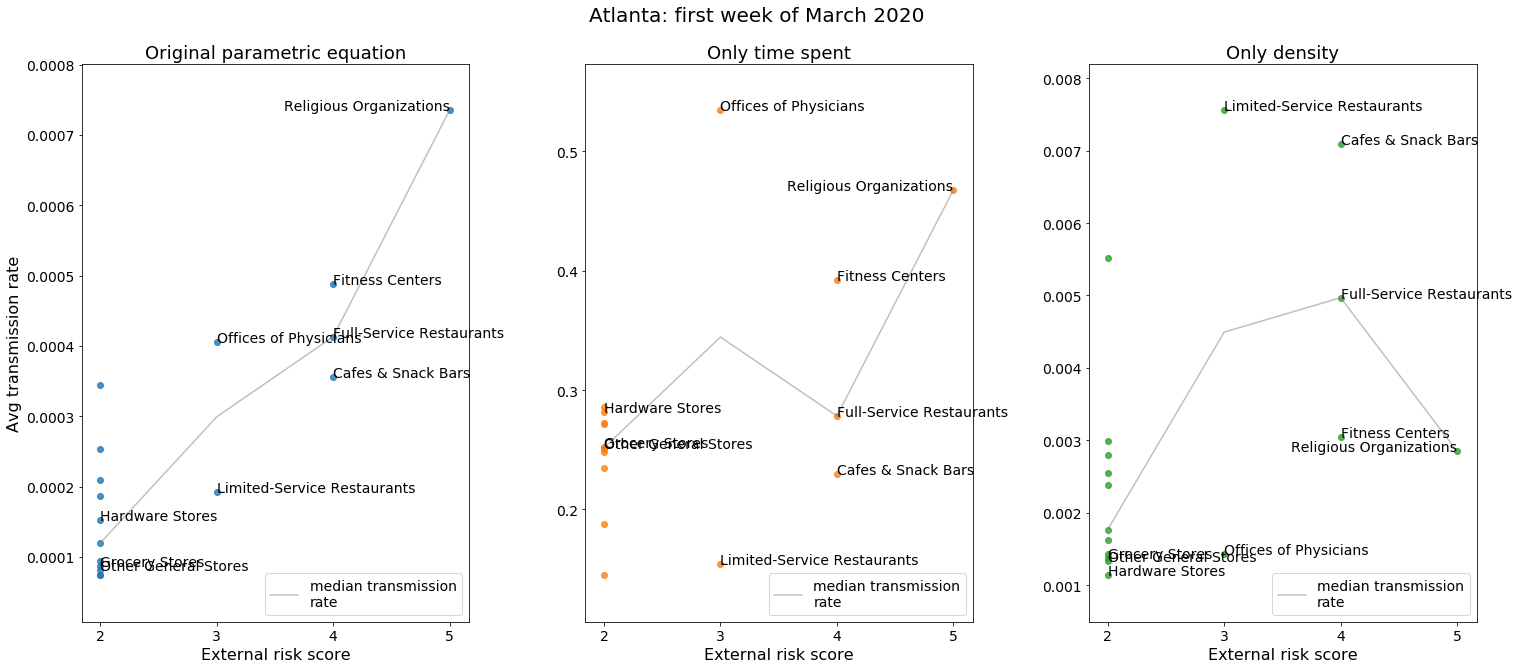

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.


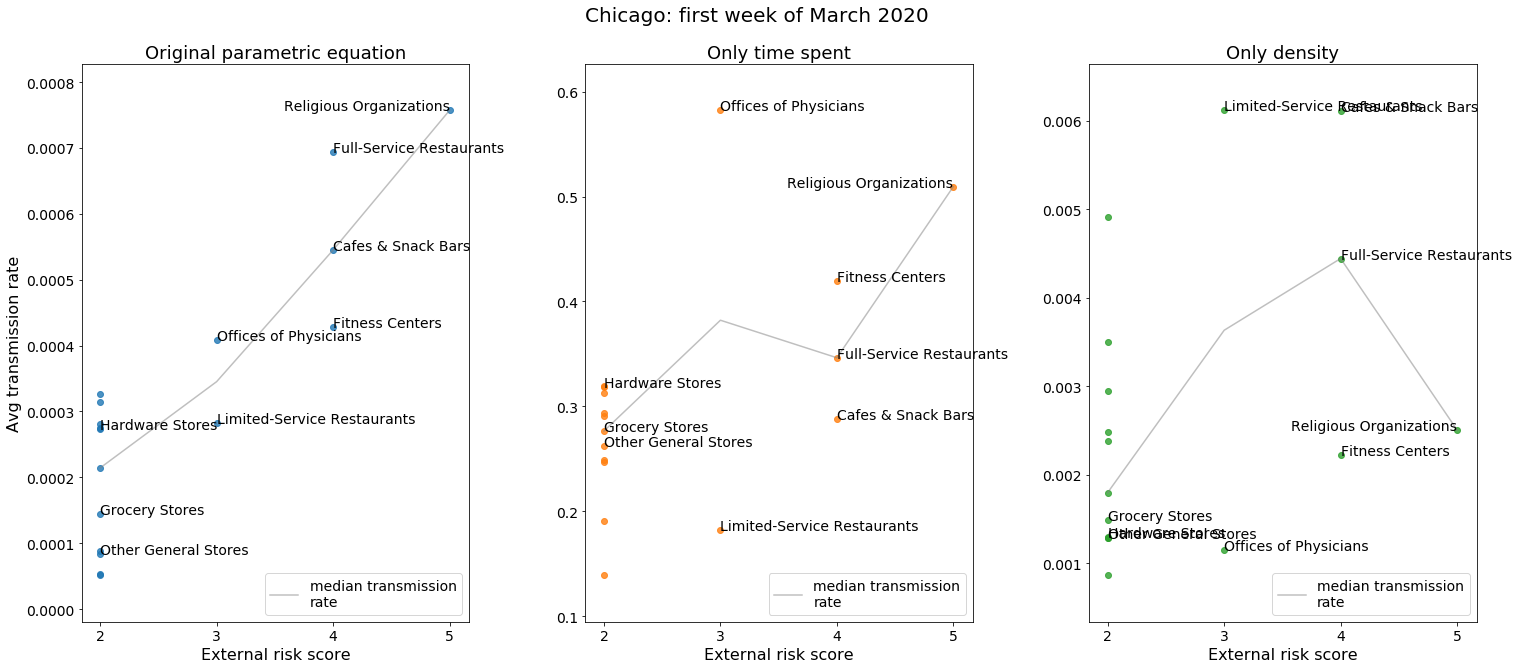

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.


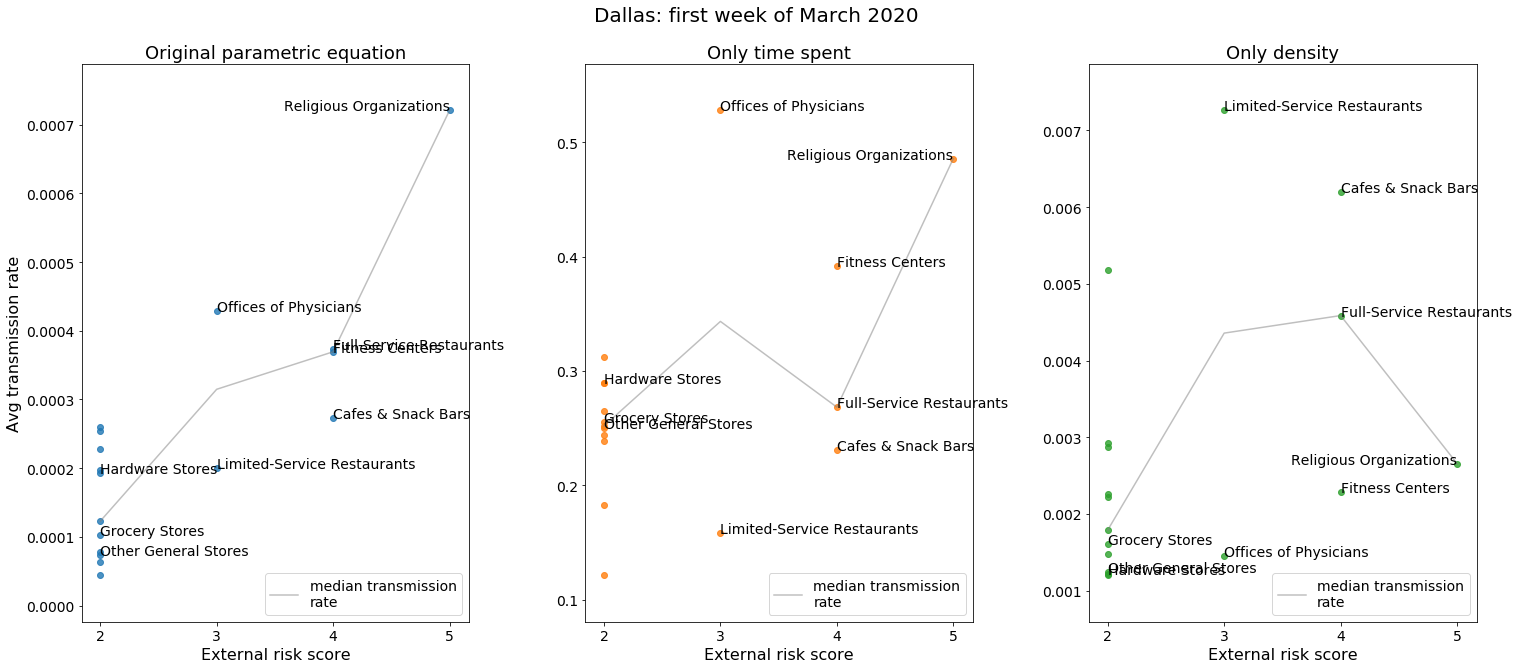

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.


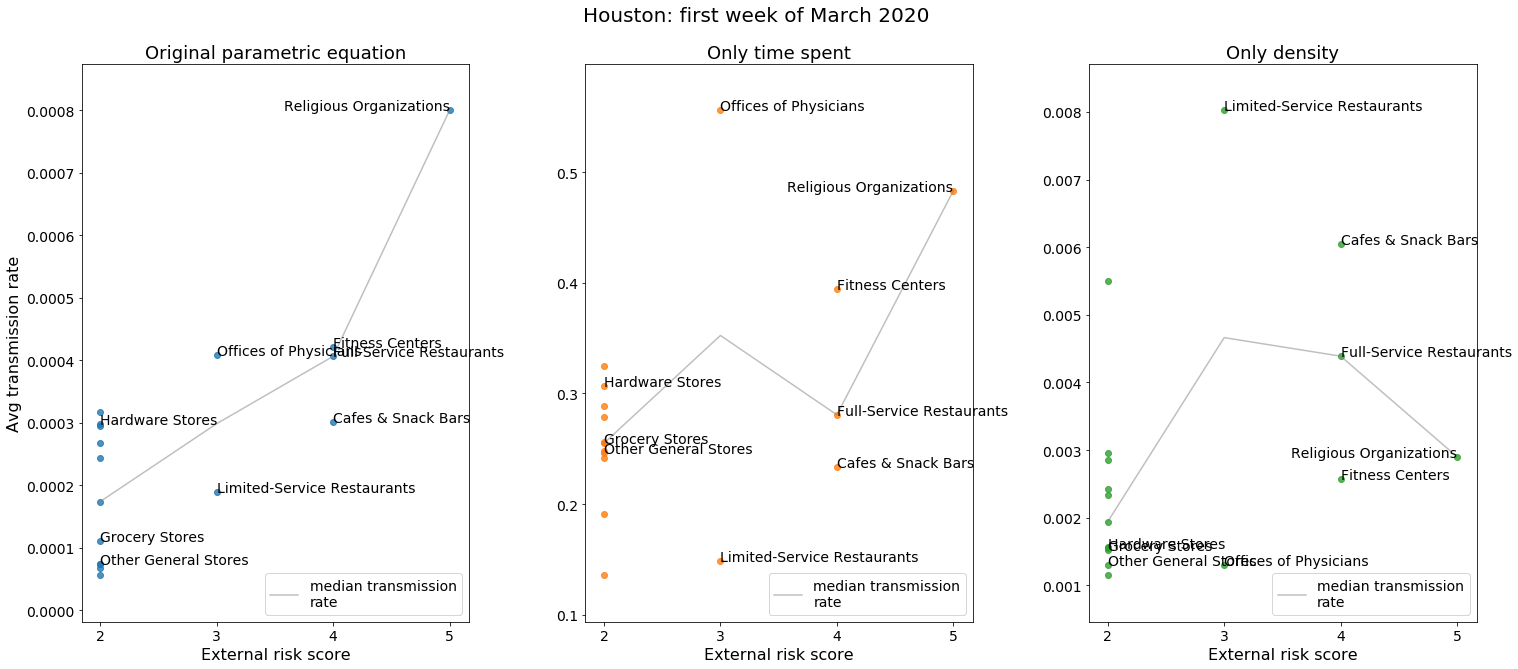

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.


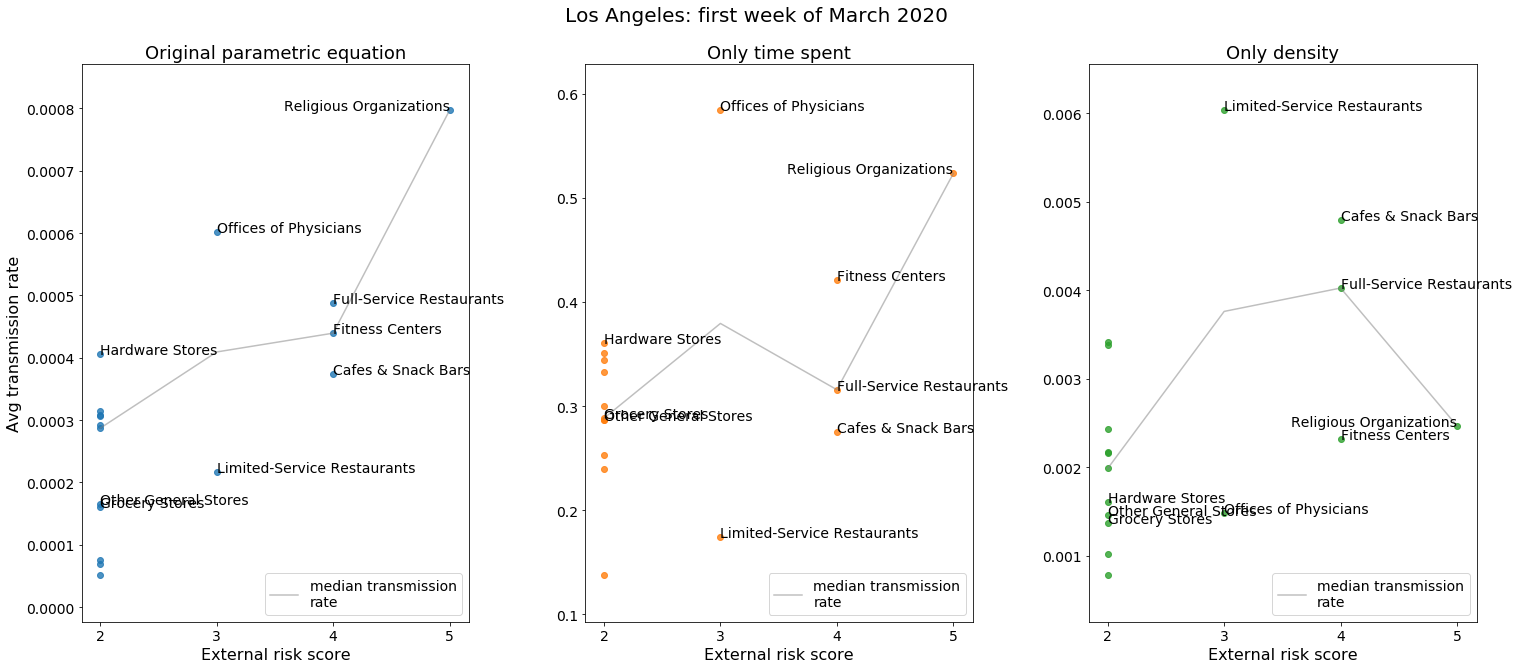

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.


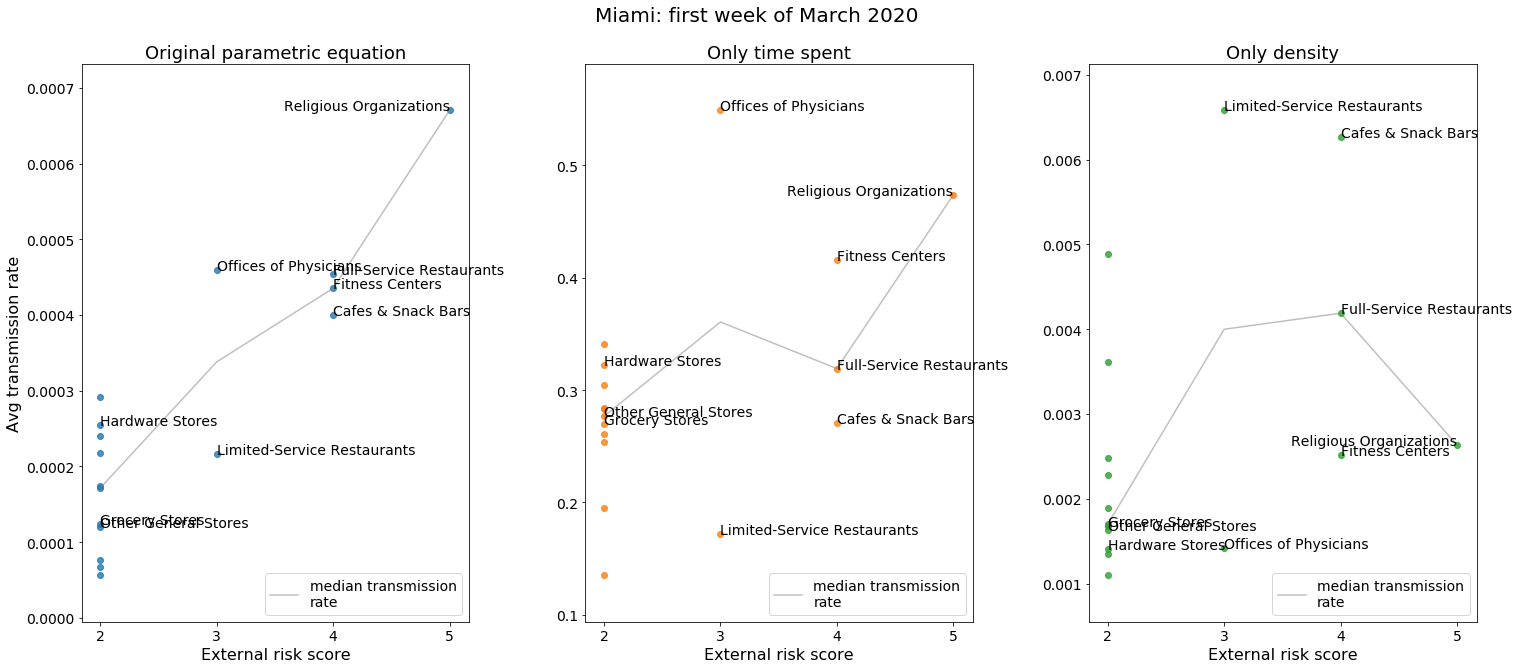

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.


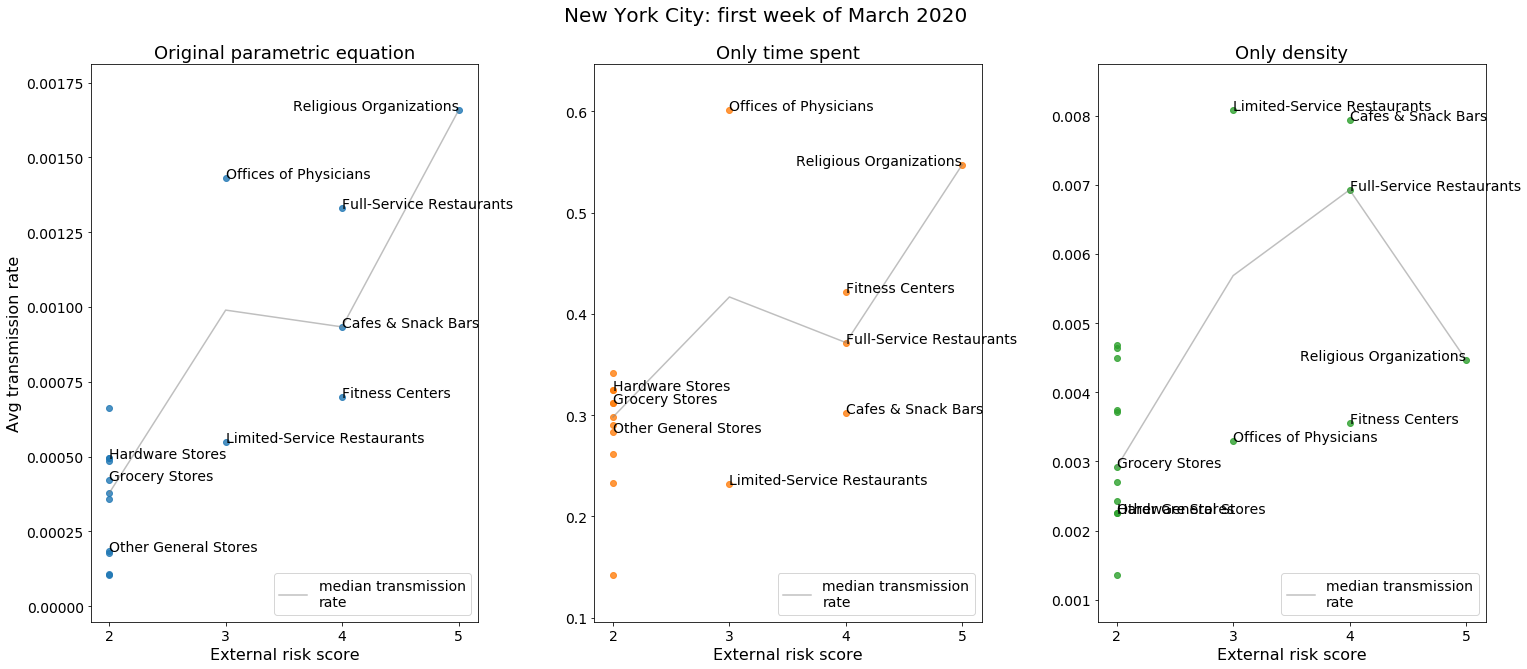

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.


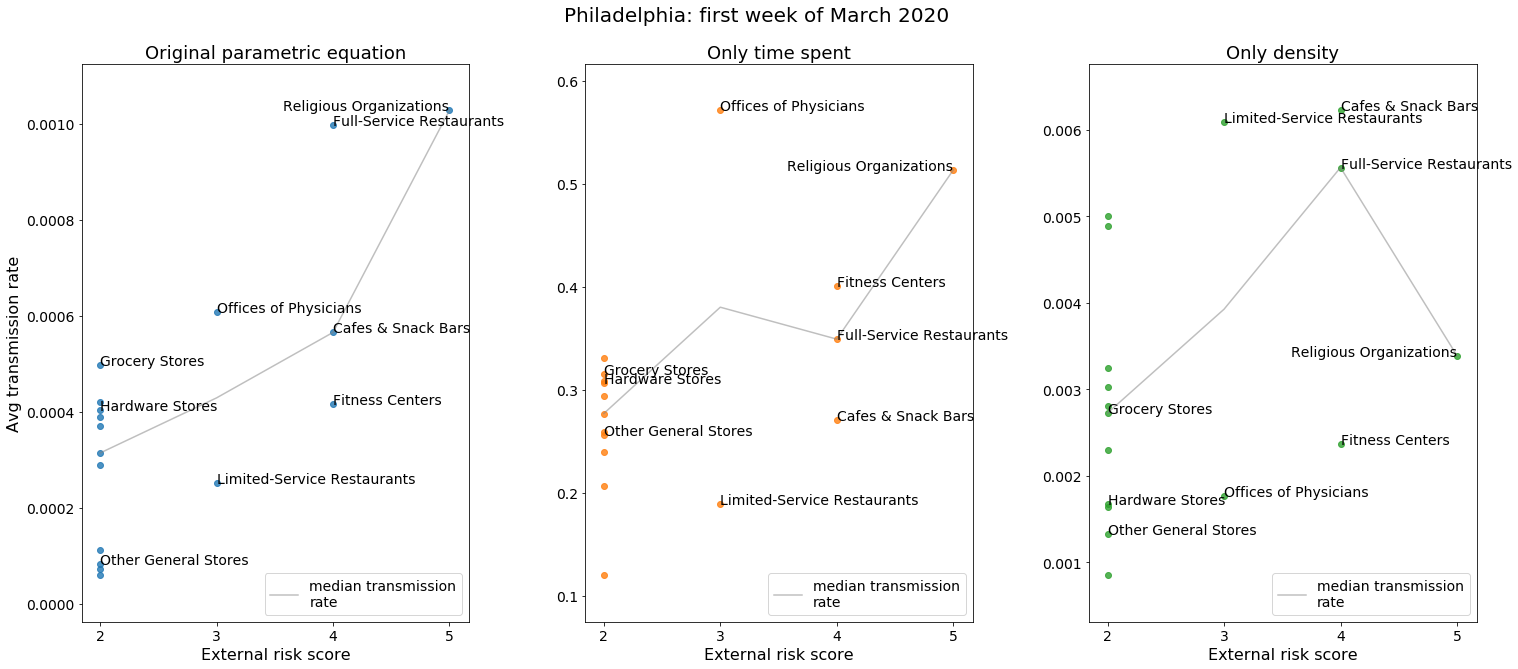

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.


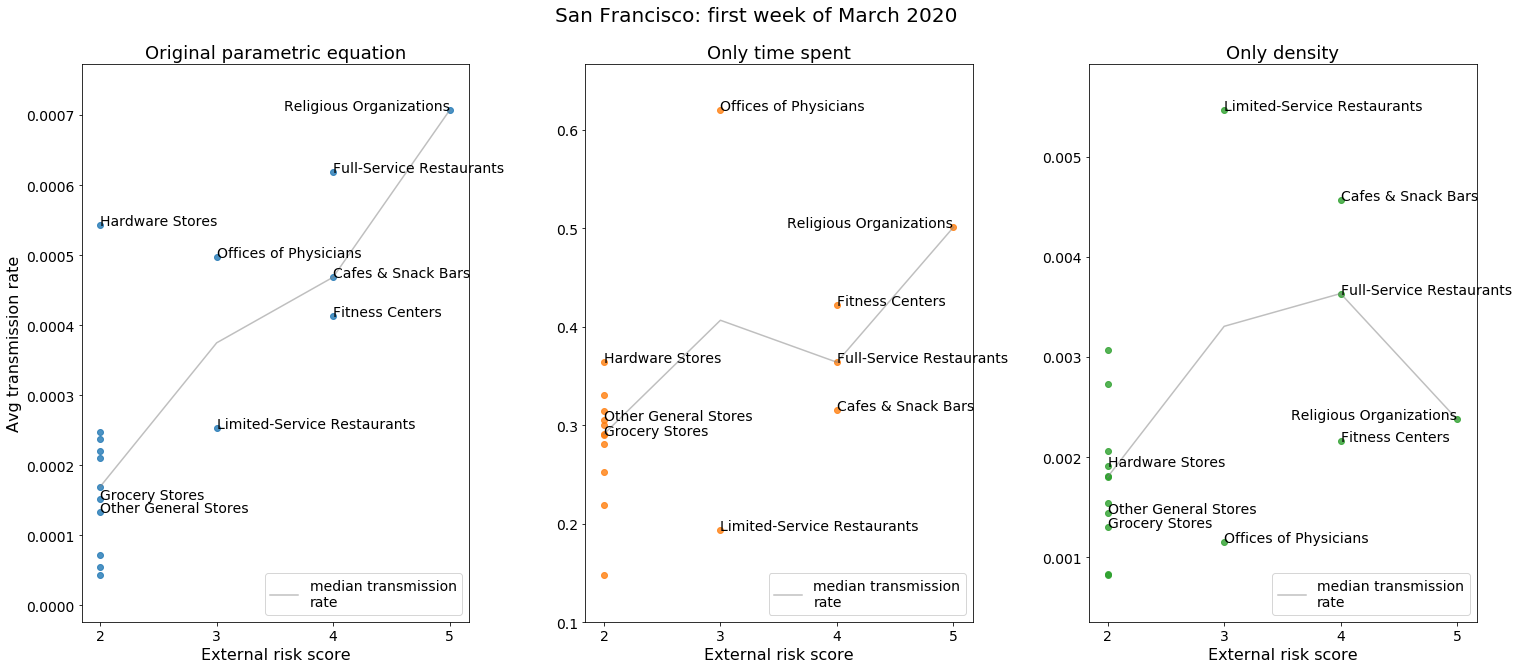

Found categories in scores [2, 3, 4, 5]
Will annotate: ['Full-Service Restaurants', 'Fitness Centers', 'Cafes & Snack Bars', 'Limited-Service Restaurants', 'Offices of Physicians', 'Other General Stores', 'Grocery Stores', 'Hardware Stores', 'Religious Organizations']
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.


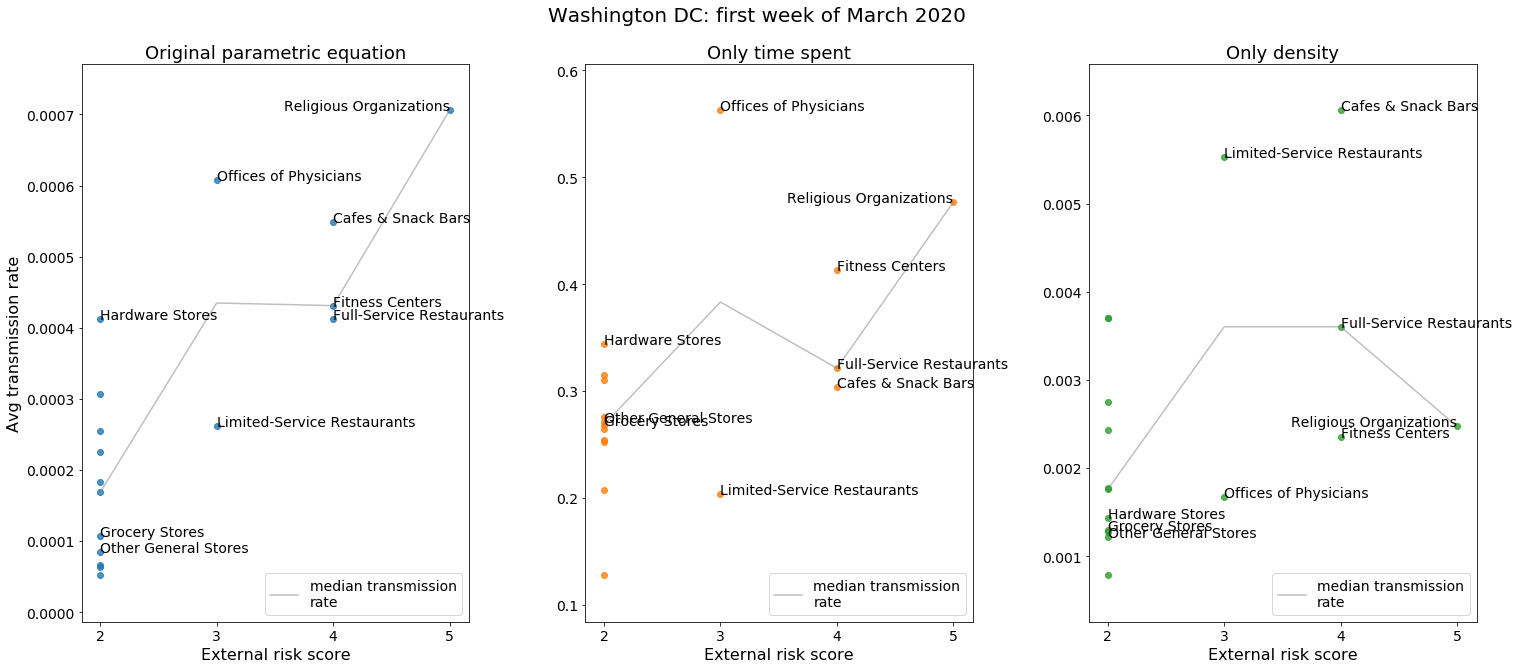

In [12]:
# get results per MSA
all_results = []
for msa in MSAS:
    msa_results = make_transmission_rate_sensitivity_plot(poi_and_cbg_characteristics, msa, 
                                                          EMANUEL_CATEGORY_TO_SCORE, pretty_top_categories)
    msa_results['MSA_name'] = msa
    all_results.append(msa_results)
    plt.show()
all_results = pd.concat(all_results)

Found categories in scores [2, 3, 4, 5]
Original parametric equation ['Hardware Stores', 'Sporting Goods Stores', 'Hobby & Toy Stores', 'Pet Stores', 'Used Merchandise Stores', 'Automotive Parts Stores', 'Grocery Stores', 'Other General Stores', 'Convenience Stores', 'Department Stores', 'Pharmacies & Drug Stores']
Only time spent ['Hardware Stores', 'Sporting Goods Stores', 'Used Merchandise Stores', 'Automotive Parts Stores', 'Pet Stores', 'Grocery Stores', 'Other General Stores', 'Hobby & Toy Stores', 'Department Stores', 'Pharmacies & Drug Stores', 'Convenience Stores']
Only density ['Hobby & Toy Stores', 'Convenience Stores', 'Pet Stores', 'Used Merchandise Stores', 'Sporting Goods Stores', 'Automotive Parts Stores', 'Grocery Stores', 'Hardware Stores', 'Pharmacies & Drug Stores', 'Other General Stores', 'Department Stores']


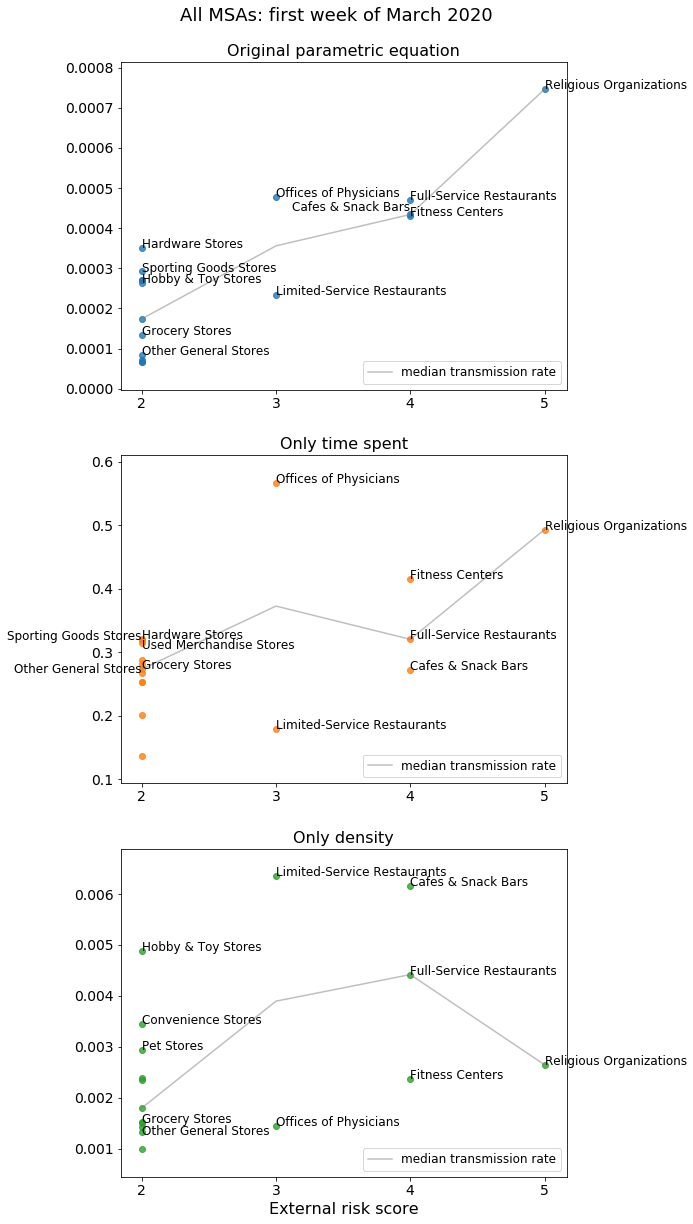

In [13]:
# custom code for figure in paper - aggregating results over all MSAs
category_scoring = EMANUEL_CATEGORY_TO_SCORE
valid_categories = pretty_top_categories

score_to_cats = {}
for cat in valid_categories:
    score = category_scoring[cat]
    if score > 0:
        if score not in score_to_cats:
            score_to_cats[score] = []
        score_to_cats[score].append(cat)
scores = sorted(score_to_cats.keys())
print('Found categories in scores', scores)

fig, axes = plt.subplots(3, 1, figsize=(8, 19))
fig.suptitle('All MSAs: first week of March 2020', fontsize=18)
plt.subplots_adjust(wspace=.3, top=0.94)
modes = ['normal', 'only_time_spent', 'drop_dwell_time']
labels = ['Original parametric equation', 'Only time spent', 'Only density']
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(len(modes)):
    mode, label, color, ax = modes[i], labels[i], colors[i], axes[i]
    subdf = all_results[all_results['mode'] == mode]
    y_min = 100
    y_max = -100
    medians = []
    for score in scores:
        cats = score_to_cats[score]
        kept_cats = []
        y = []
        for cat in cats:
            rows = subdf[subdf['category'] == cat]
            if len(rows) >= 5:
                kept_cats.append(cat)
                y.append(np.median(rows.avg_transmission_rate.values))
        x = np.ones(len(kept_cats)) * score
        ax.scatter(x, y, alpha=0.8, color=color)
        medians.append(np.median(y))
        y_min = min(y_min, min(y))
        y_max = max(y_max, max(y))
        if score == 2:
            ordering = np.argsort(-1 * np.array(y))
            print(label, [kept_cats[j] for j in ordering])
        for cat, x_pt, y_pt in zip(kept_cats, x, y):
            if mode == 'normal':
                if score > 2:
                    if cat in {'Cafes & Snack Bars'}:
                        ax.annotate(cat, xy=(x_pt, y_pt), ha='right', 
                                    xytext=(0, 3), textcoords='offset pixels', fontsize=12)
                    else:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
                else:
                    if cat in {'Other General Stores', 'Grocery Stores', 
                               'Hardware Stores', 'Sporting Goods Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
                    elif cat in {'Hobby & Toy Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12,
                                    xytext=(0, -3), textcoords='offset pixels')
            elif mode == 'only_time_spent':
                if score > 2:
                    ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
                else:
                    if cat in {'Grocery Stores', 'Hardware Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
                    elif cat in {'Other General Stores', 'Sporting Goods Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='right', fontsize=12)
                    elif cat in {'Used Merchandise Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12,
                                    xytext=(0, -6), textcoords='offset pixels')
            else:
                if score > 2:
                    ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
                else:
                    if cat in {'Grocery Stores', 'Pet Stores',
                               'Hobby & Toy Stores', 'Convenience Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12) 
                    elif cat in {'Other General Stores'}:
                        ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12,
                                    xytext=(0, -3), textcoords='offset pixels')

    ax.plot(scores, medians, color='grey', label='median transmission rate', alpha=0.5)
    ax.legend(fontsize=12, loc='lower right')
    ax.set_xticks(scores)
    ax.tick_params(labelsize=14)
    if i == 2:
        ax.set_xlabel('External risk score', fontsize=16)
    ax.set_title(label, fontsize=16)
    offset = (y_max - y_min) * .1
    ax.set_ylim(y_min - offset, y_max + offset)

### Based on MLink ranking

In [14]:
# https://www.mlive.com/public-interest/2020/06/from-hair-salonsto-gyms-experts-rank-36-activities-by-coronavirus-risk-level.html
MLINK_CATEGORY_TO_SCORE = {
    'Full-Service Restaurants':6,
    'Limited-Service Restaurants':0,
    'Other General Stores':0, # retail
    'Gas Stations':2,
    'Fitness Centers':8,
    'Grocery Stores':3,
    'Cafes & Snack Bars':0,
    'Hotels & Motels':3,
    'Religious Organizations':8,
    'Hardware Stores':0,
    
    'Department Stores':0,
    'Offices of Physicians':0,
    'Pharmacies & Drug Stores':0,
    'Sporting Goods Stores':0,
    'Automotive Parts Stores':0,
    'Used Merchandise Stores':0,
    'Convenience Stores':0,
    'Pet Stores':0,
    'New Car Dealers':0,
    'Hobby & Toy Stores':0,
}

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 47/39411 POIs with 0 visits in this time period.


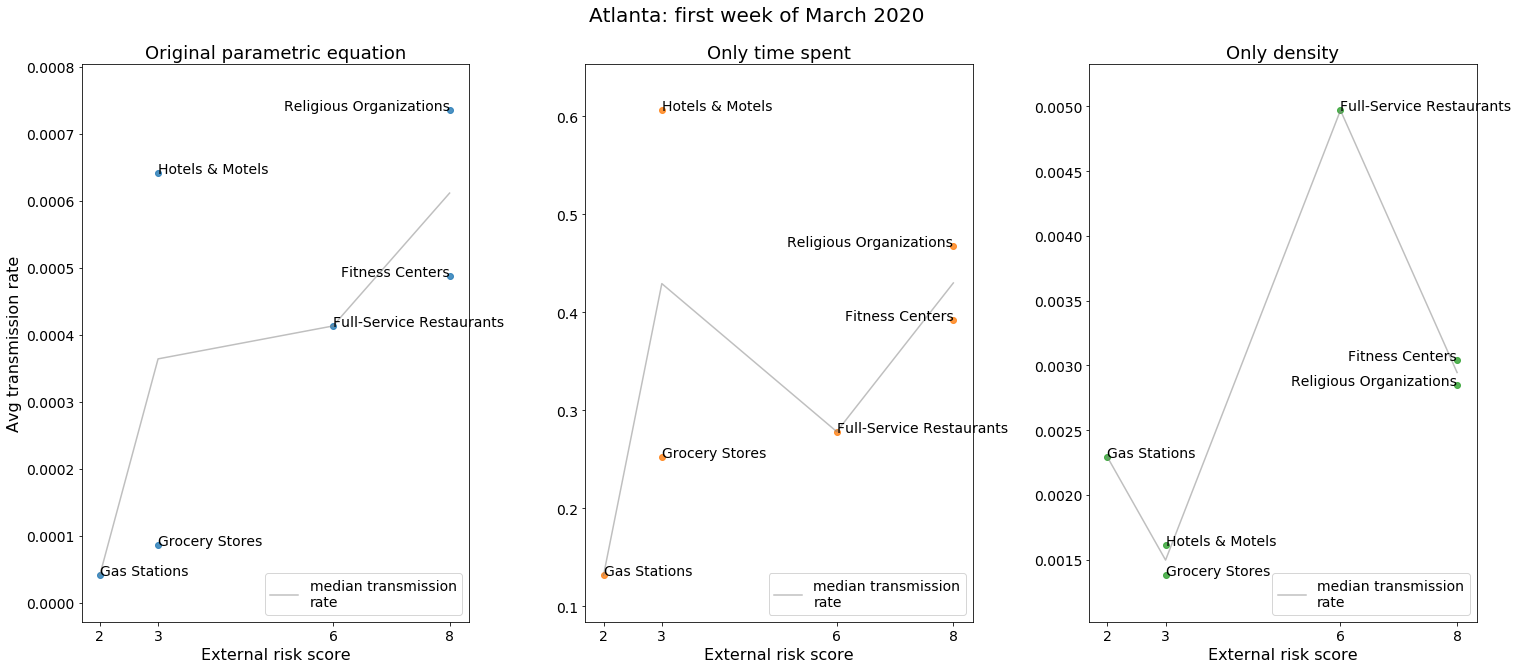

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 87/62420 POIs with 0 visits in this time period.


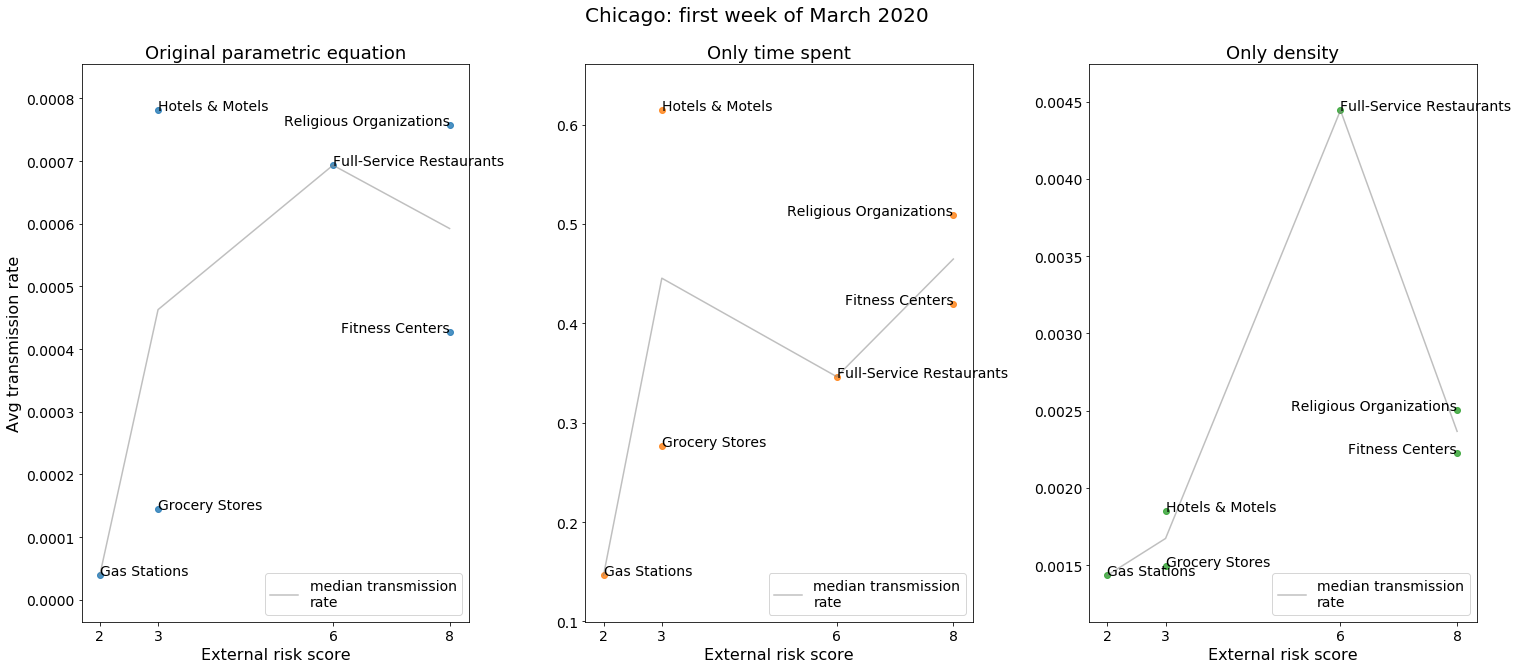

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 56/52999 POIs with 0 visits in this time period.


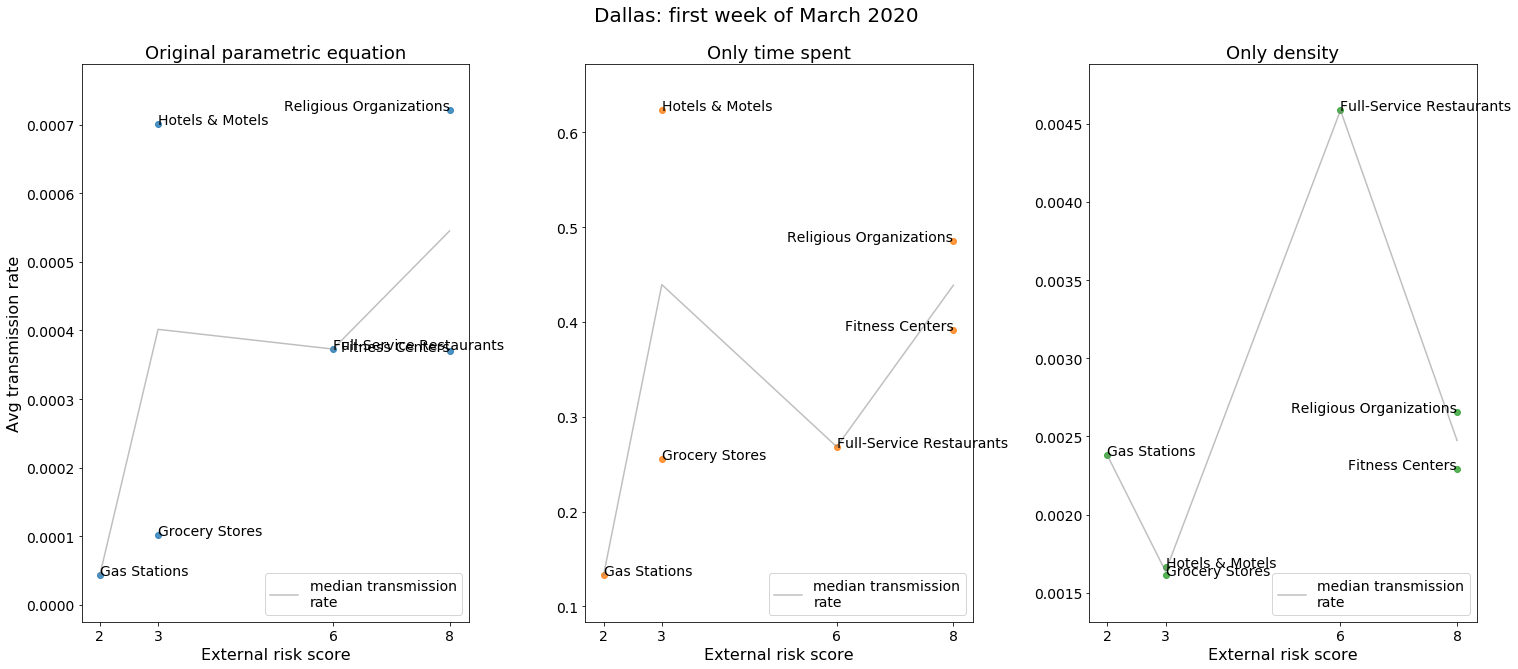

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 55/49622 POIs with 0 visits in this time period.


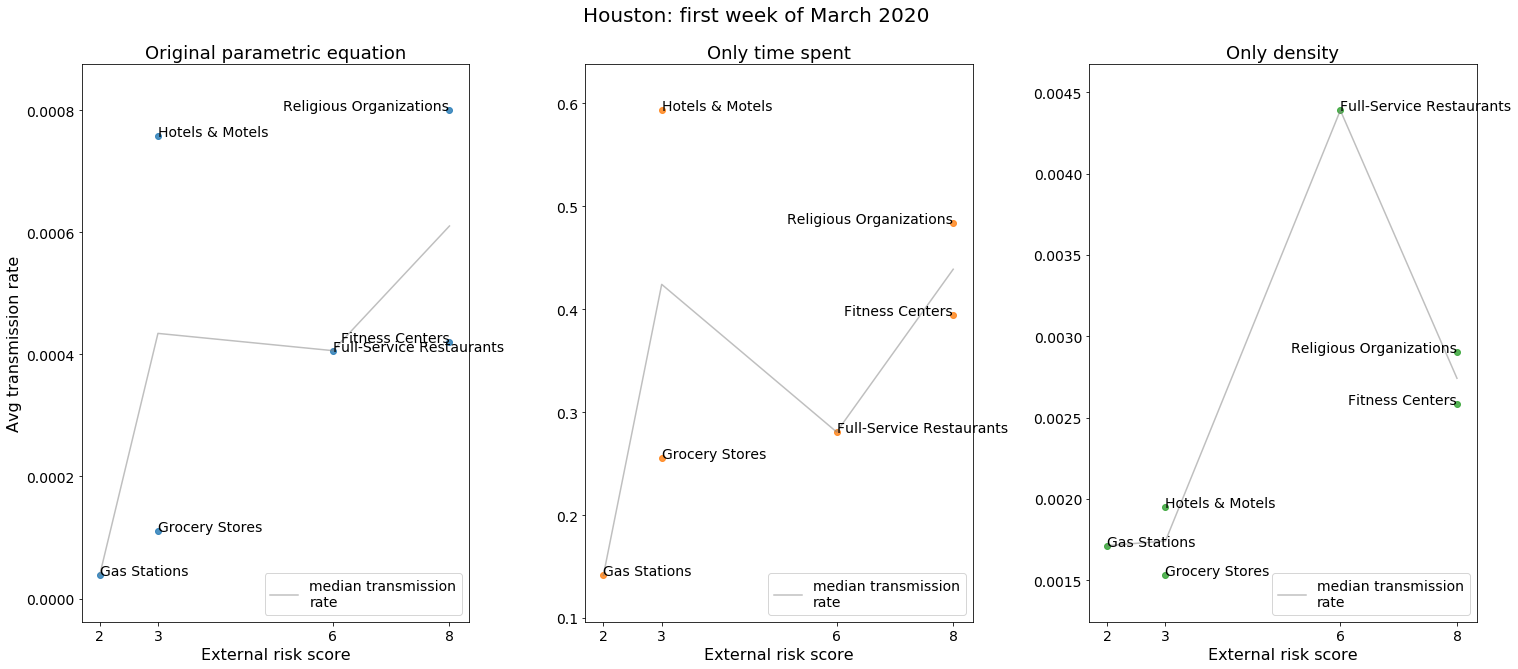

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 83/83954 POIs with 0 visits in this time period.


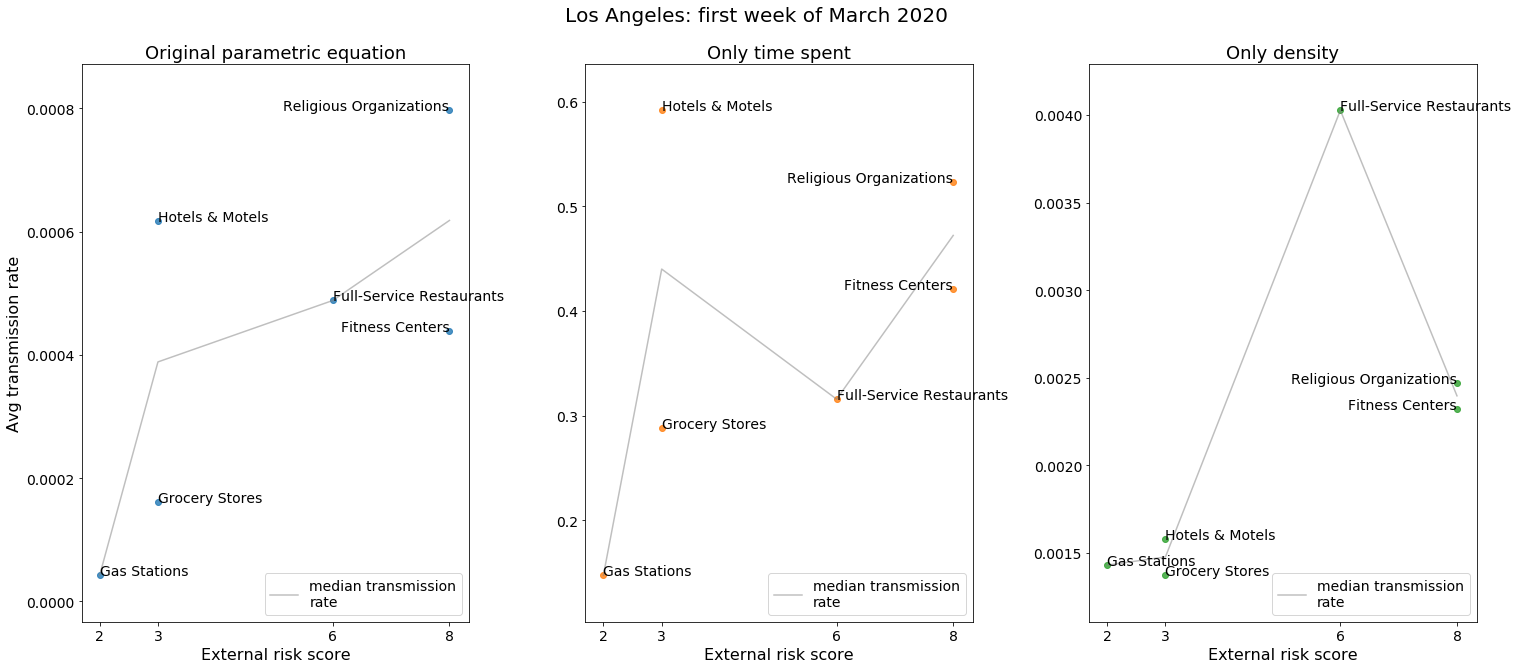

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 38/40964 POIs with 0 visits in this time period.


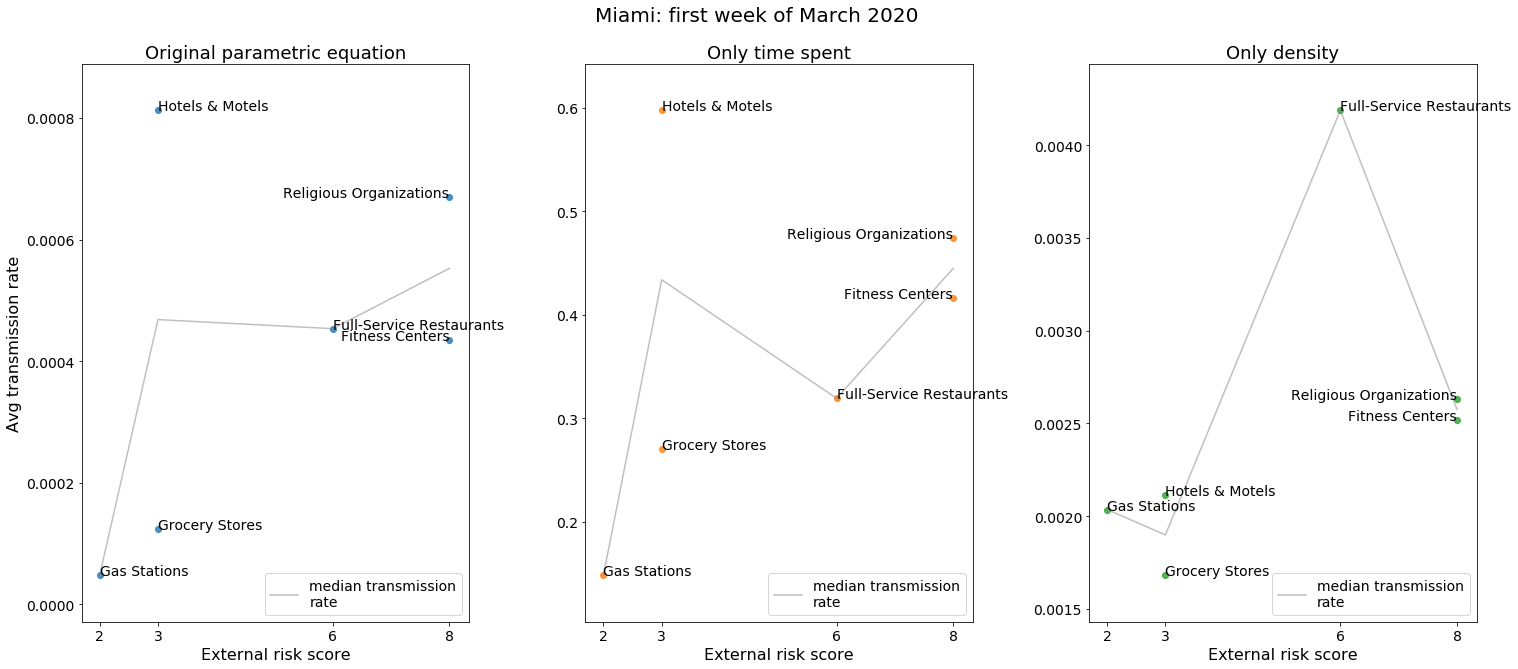

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 152/122428 POIs with 0 visits in this time period.


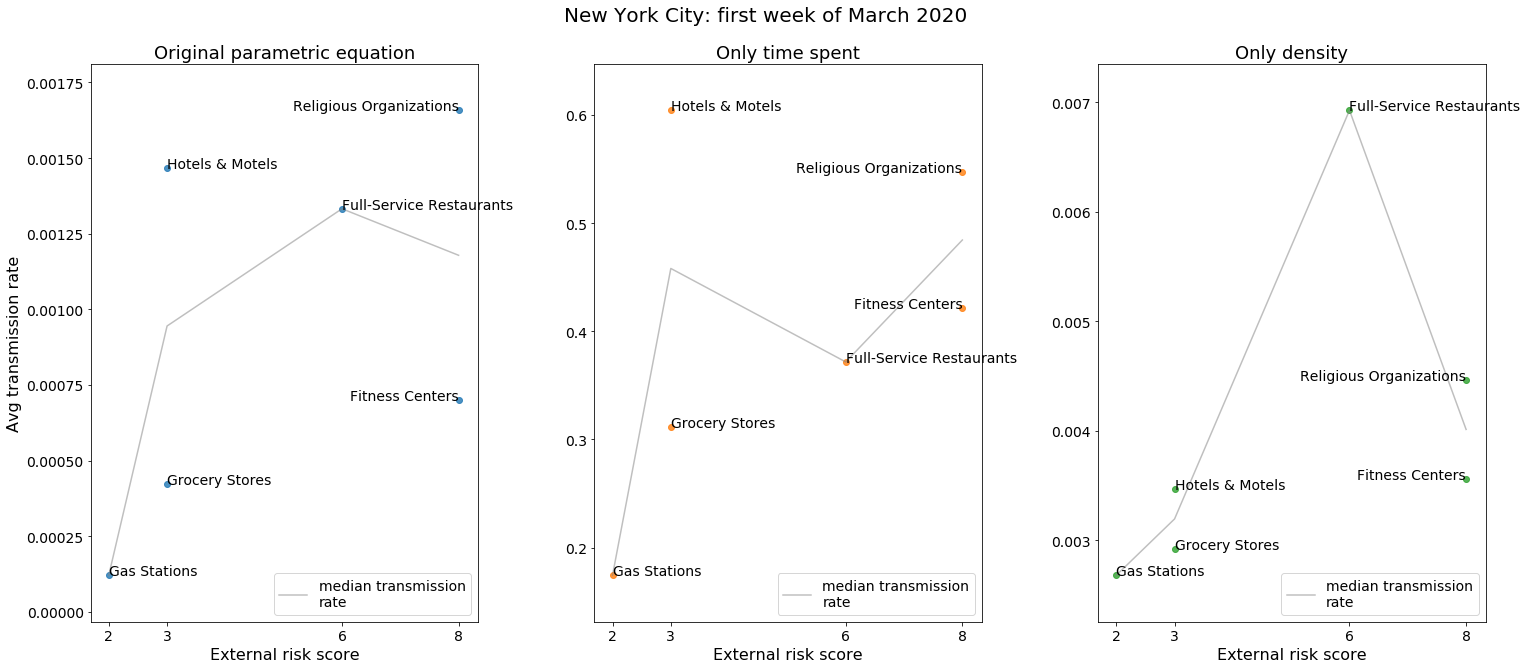

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 49/37951 POIs with 0 visits in this time period.


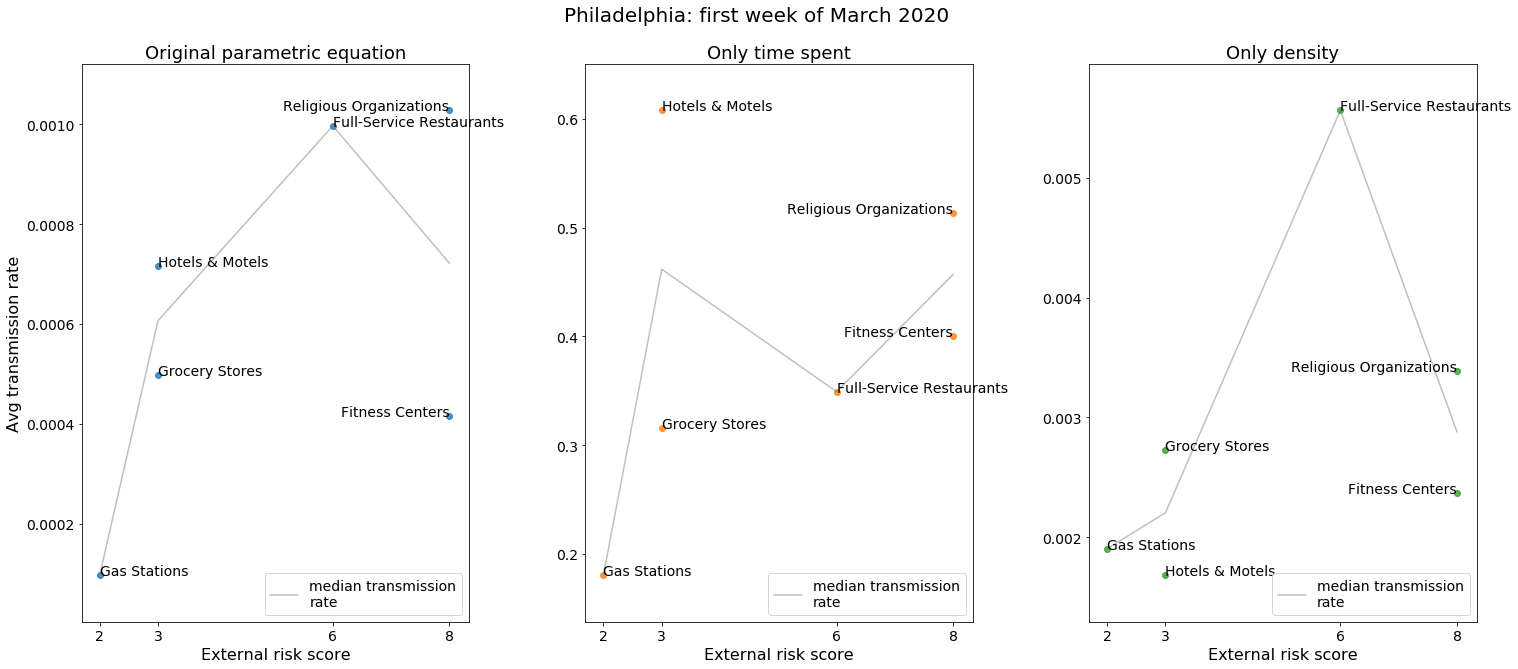

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 39/28713 POIs with 0 visits in this time period.


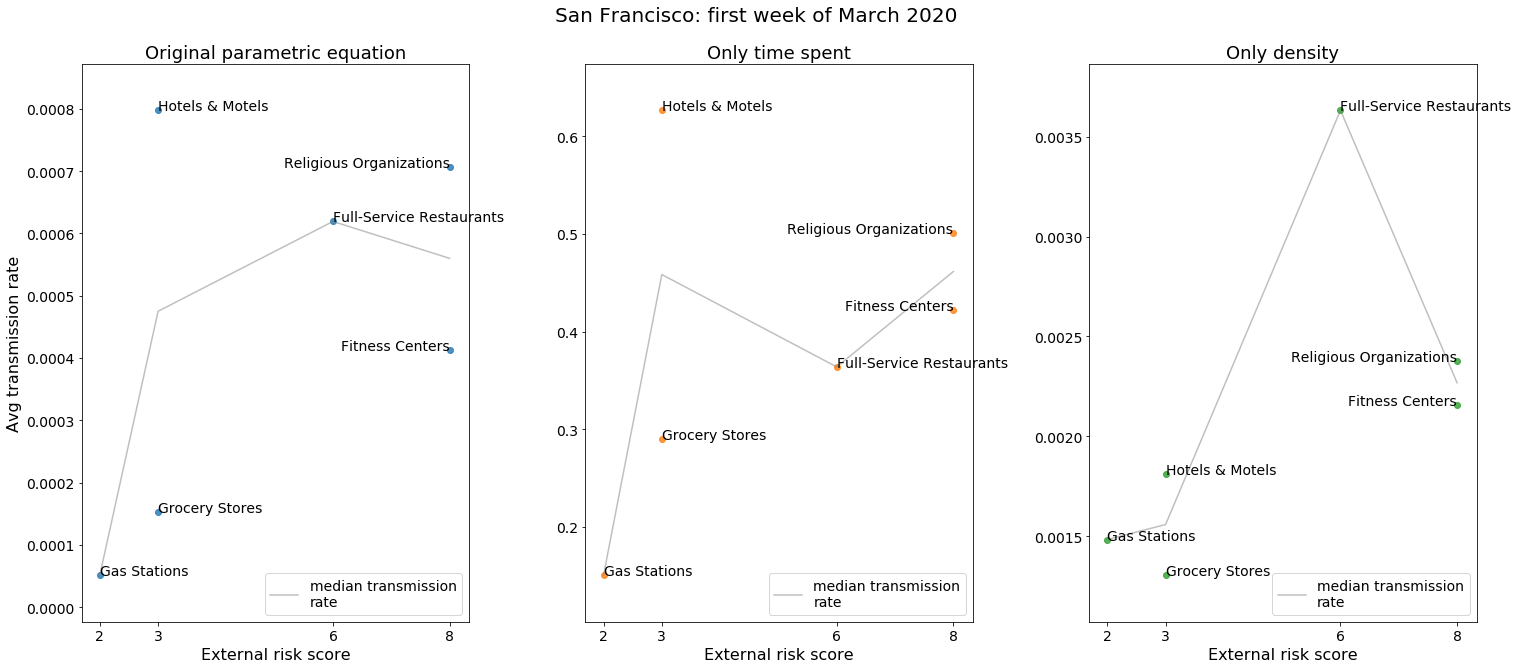

Found categories in scores [2, 3, 6, 8]
Will annotate: ['Full-Service Restaurants', 'Gas Stations', 'Fitness Centers', 'Religious Organizations', 'Grocery Stores', 'Hotels & Motels']
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.
Aggregating data from 168 hours
Dropped 43/34296 POIs with 0 visits in this time period.


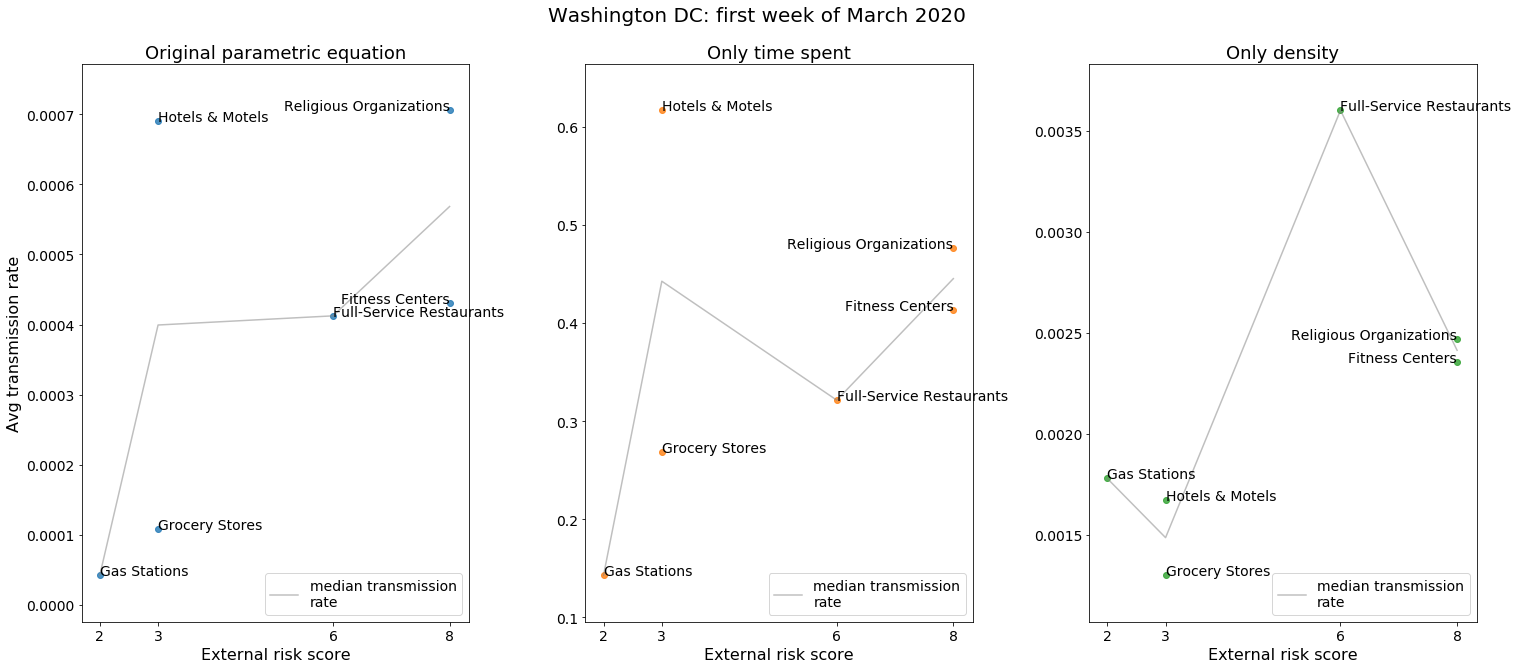

In [15]:
# get results per MSA
all_results = []
for msa in MSAS:
    msa_results = make_transmission_rate_sensitivity_plot(poi_and_cbg_characteristics, msa, 
                                                        MLINK_CATEGORY_TO_SCORE, pretty_top_categories)
    msa_results['MSA_name'] = msa
    all_results.append(msa_results)
    plt.show()
all_results = pd.concat(all_results)

Found categories in scores [2, 3, 6, 8]


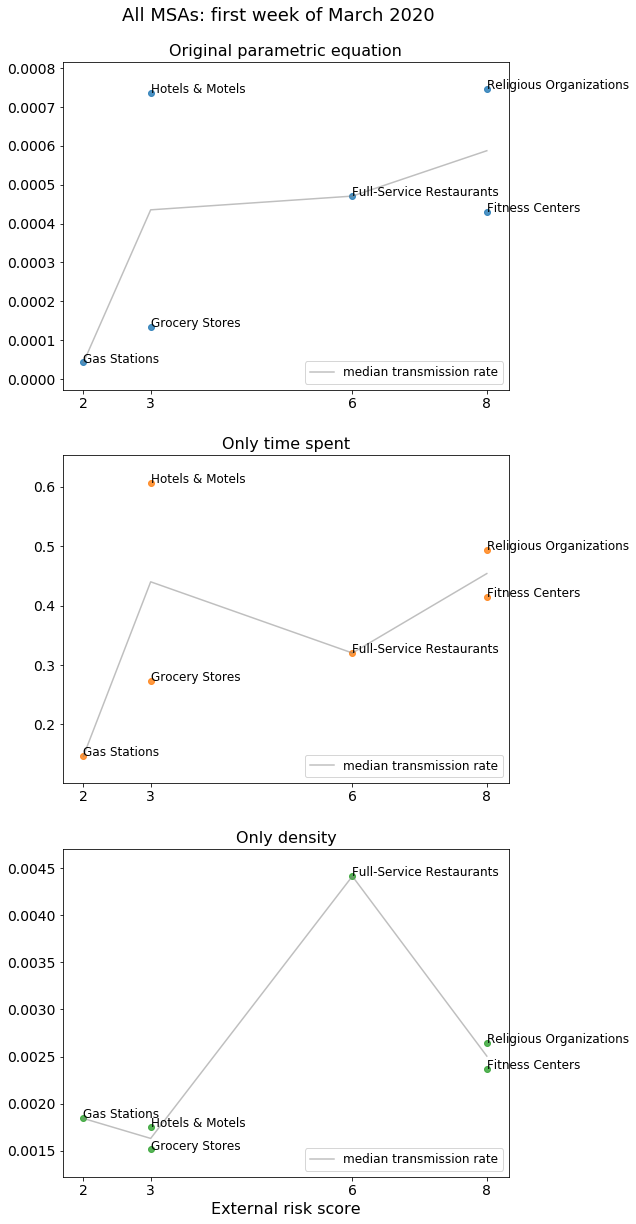

In [16]:
# custom code for figure in paper - aggregating results over all MSAs
category_scoring = MLINK_CATEGORY_TO_SCORE
valid_categories = pretty_top_categories

score_to_cats = {}
for cat in valid_categories:
    score = category_scoring[cat]
    if score > 0:
        if score not in score_to_cats:
            score_to_cats[score] = []
        score_to_cats[score].append(cat)
scores = sorted(score_to_cats.keys())
print('Found categories in scores', scores)

fig, axes = plt.subplots(3, 1, figsize=(8, 19))
fig.suptitle('All MSAs: first week of March 2020', fontsize=18)
plt.subplots_adjust(wspace=.3, top=0.94)
modes = ['normal', 'only_time_spent', 'drop_dwell_time']
labels = ['Original parametric equation', 'Only time spent', 'Only density']
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(len(modes)):
    mode, label, color, ax = modes[i], labels[i], colors[i], axes[i]
    subdf = all_results[all_results['mode'] == mode]
    y_min = 100
    y_max = -100
    medians = []
    for score in scores:
        cats = score_to_cats[score]
        kept_cats = []
        y = []
        for cat in cats:
            rows = subdf[subdf['category'] == cat]
            if len(rows) >= 5:
                kept_cats.append(cat)
                y.append(np.median(rows.avg_transmission_rate.values))
        x = np.ones(len(kept_cats)) * score
        ax.scatter(x, y, alpha=0.8, color=color)
        medians.append(np.median(y))
        y_min = min(y_min, min(y))
        y_max = max(y_max, max(y))
        for cat, x_pt, y_pt in zip(kept_cats, x, y):
            ax.annotate(cat, (x_pt, y_pt), ha='left', fontsize=12)
    ax.plot(scores, medians, color='grey', label='median transmission rate', alpha=0.5)
    ax.legend(fontsize=12, loc='lower right')
    ax.set_xticks(scores)
    ax.tick_params(labelsize=14)
    if i == 2:
        ax.set_xlabel('External risk score', fontsize=16)
    ax.set_title(label, fontsize=16)
    offset = (y_max - y_min) * .1
    ax.set_ylim(y_min - offset, y_max + offset)

## 3. Stochastic sampling of confirmed cases

Atlanta_Sandy_Springs_Roswell_GA
Found 16 best fit models within threshold for Atlanta
Found 16 best fit models within threshold for Atlanta
Chicago_Naperville_Elgin_IL_IN_WI
Found 4 best fit models within threshold for Chicago
Found 4 best fit models within threshold for Chicago
Dallas_Fort_Worth_Arlington_TX
Found 5 best fit models within threshold for Dallas
Found 5 best fit models within threshold for Dallas
Houston_The_Woodlands_Sugar_Land_TX
Found 8 best fit models within threshold for Houston
Found 8 best fit models within threshold for Houston
Los_Angeles_Long_Beach_Anaheim_CA
Found 25 best fit models within threshold for Los Angeles
Found 25 best fit models within threshold for Los Angeles
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Found 7 best fit models within threshold for Miami
Found 7 best fit models within threshold for Miami
New_York_Newark_Jersey_City_NY_NJ_PA
Found 7 best fit models within threshold for New York City
Found 7 best fit models within threshold for New York

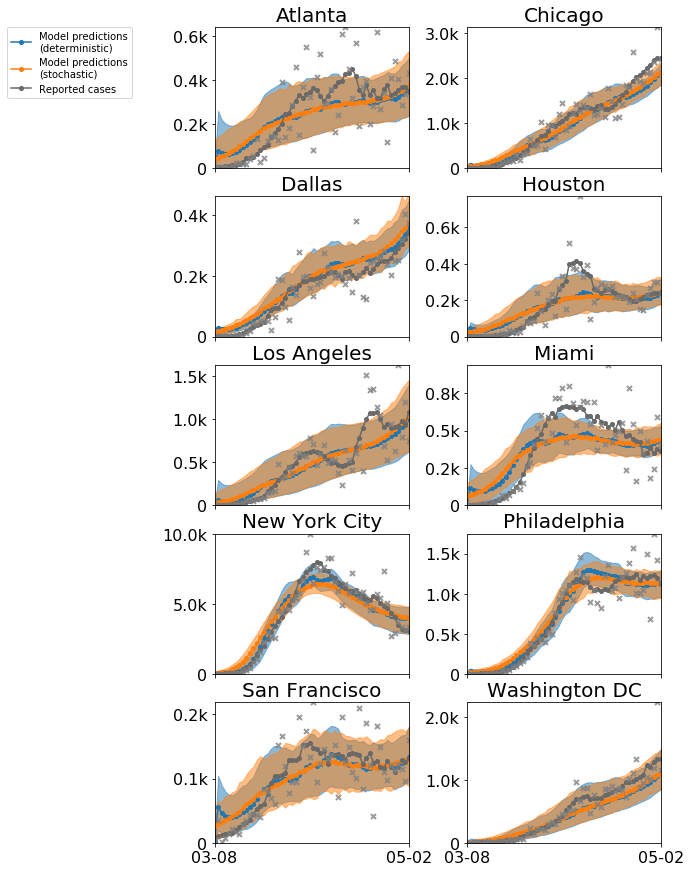

In [3]:
# Compare fixed vs stochastic case prediction, with Gamma delay distribution
fig, axes = plt.subplots(5, 2, figsize=(8,15), sharex=True)
fig.subplots_adjust(wspace=0.3)
axes = [ax for axes_row in axes for ax in axes_row]
train_test_partition = None
plot_daily_not_cumulative = True
key_to_sort_by = 'loss_dict_daily_cases_RMSE'

for ax_idx, (ax, msa_name) in enumerate(zip(axes, MSAS)):
    print(msa_name)
    other_plotting_kwargs =  {
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8), 
                      datetime.datetime(2020, 5, 2)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 2)],        
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'model_line_label': 'Model predictions\n(deterministic)',
            'true_line_label': 'Reported cases',
            'title_fontsize':20,
            'marker_size':4,
            'plot_real_data':False,
            'model_color':'tab:blue',
    }
    plot_best_models_fit_for_msa(non_ablation_df, msa_name, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)

    other_plotting_kwargs =  {
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8), 
                      datetime.datetime(2020, 5, 2)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 2)],        
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'model_line_label': 'Model predictions\n(stochastic)',
            'true_line_label': 'Reported cases',
            'title_fontsize':20,
            'marker_size':4,
            'real_data_color':'dimgrey',
            'model_color':'tab:orange',
            'prediction_mode':'gamma',
    }
    plot_best_models_fit_for_msa(non_ablation_df, msa_name, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)
    if ax_idx == 0:
        ax.legend(bbox_to_anchor=(-0.4, 1.04))                                              

Atlanta_Sandy_Springs_Roswell_GA
Found 16 best fit models within threshold for Atlanta
Found 16 best fit models within threshold for Atlanta
Chicago_Naperville_Elgin_IL_IN_WI
Found 4 best fit models within threshold for Chicago
Found 4 best fit models within threshold for Chicago
Dallas_Fort_Worth_Arlington_TX
Found 5 best fit models within threshold for Dallas
Found 5 best fit models within threshold for Dallas
Houston_The_Woodlands_Sugar_Land_TX
Found 8 best fit models within threshold for Houston
Found 8 best fit models within threshold for Houston
Los_Angeles_Long_Beach_Anaheim_CA
Found 25 best fit models within threshold for Los Angeles
Found 25 best fit models within threshold for Los Angeles
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Found 7 best fit models within threshold for Miami
Found 7 best fit models within threshold for Miami
New_York_Newark_Jersey_City_NY_NJ_PA
Found 7 best fit models within threshold for New York City
Found 7 best fit models within threshold for New York

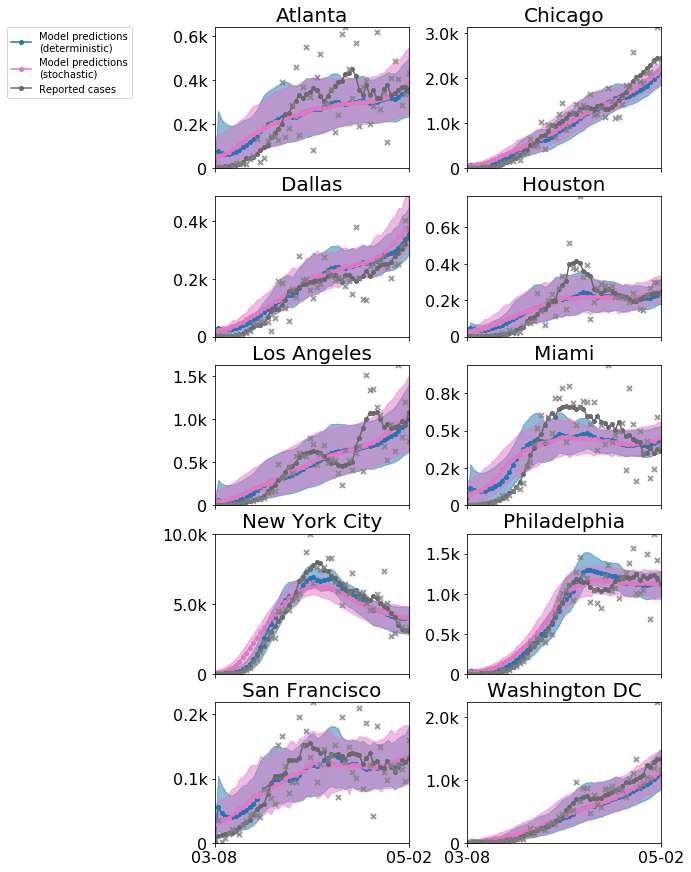

In [4]:
# Compare fixed vs stochastic case prediction, with Exponential delay distribution
fig, axes = plt.subplots(5, 2, figsize=(8,15), sharex=True)
fig.subplots_adjust(wspace=0.3)
axes = [ax for axes_row in axes for ax in axes_row]
train_test_partition = None
plot_daily_not_cumulative = True
key_to_sort_by = 'loss_dict_daily_cases_RMSE'

for ax_idx, (ax, msa_name) in enumerate(zip(axes, MSAS)):
    print(msa_name)
    other_plotting_kwargs =  {
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8), 
                      datetime.datetime(2020, 5, 2)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 2)],        
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'model_line_label': 'Model predictions\n(deterministic)',
            'true_line_label': 'Reported cases',
            'title_fontsize':20,
            'marker_size':4,
            'plot_real_data':False,
            'model_color':'tab:blue',
    }
    plot_best_models_fit_for_msa(non_ablation_df, msa_name, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)

    other_plotting_kwargs =  {
            'plot_log':False, 
            'plot_legend':False,
            'plot_errorbars':True,
            'xticks':[datetime.datetime(2020, 3, 8), 
                      datetime.datetime(2020, 5, 2)],                                                                             
            'x_range':[datetime.datetime(2020, 3, 8),
                       datetime.datetime(2020, 5, 2)],        
            'plot_daily_not_cumulative':plot_daily_not_cumulative,
            'model_line_label': 'Model predictions\n(stochastic)',
            'true_line_label': 'Reported cases',
            'title_fontsize':20,
            'marker_size':4,
            'real_data_color':'dimgrey',
            'model_color':'tab:pink',
            'prediction_mode':'exponential',
            'detection_lag':6.1,
    }
    plot_best_models_fit_for_msa(non_ablation_df, msa_name, ax, key_to_sort_by, train_test_partition, 
                                 other_plotting_kwargs)
    if ax_idx == 0:
        ax.legend(bbox_to_anchor=(-0.4, 1.04))                                              

## 4. Model calibration metrics

In [24]:
# check which metrics we stored
metrics = [col for col in non_ablation_df if col.startswith('loss_dict_daily_cases') or col.startswith('loss_dict_daily_deaths')]
print(len(metrics))
print(metrics)

94
['loss_dict_daily_cases_MRE_thres-100_sum', 'loss_dict_daily_cases_MRE_thres-10_sum', 'loss_dict_daily_cases_MRE_thres-1_sum', 'loss_dict_daily_cases_MRE_thres-20_sum', 'loss_dict_daily_cases_MRE_thres-50_sum', 'loss_dict_daily_cases_MSE', 'loss_dict_daily_cases_NLL_with_var_y_thres-100_logsumexp', 'loss_dict_daily_cases_NLL_with_var_y_thres-100_sum', 'loss_dict_daily_cases_NLL_with_var_y_thres-10_logsumexp', 'loss_dict_daily_cases_NLL_with_var_y_thres-10_sum', 'loss_dict_daily_cases_NLL_with_var_y_thres-1_logsumexp', 'loss_dict_daily_cases_NLL_with_var_y_thres-1_sum', 'loss_dict_daily_cases_NLL_with_var_y_thres-20_logsumexp', 'loss_dict_daily_cases_NLL_with_var_y_thres-20_sum', 'loss_dict_daily_cases_NLL_with_var_y_thres-50_logsumexp', 'loss_dict_daily_cases_NLL_with_var_y_thres-50_sum', 'loss_dict_daily_cases_NLL_with_var_ysq_thres-100_logsumexp', 'loss_dict_daily_cases_NLL_with_var_ysq_thres-100_sum', 'loss_dict_daily_cases_NLL_with_var_ysq_thres-10_logsumexp', 'loss_dict_daily_c

In [18]:
rmse_losses = non_ablation_df['loss_dict_daily_cases_RMSE'].values
rmse_best = get_best_models_for_all_msas(non_ablation_df, 'loss_dict_daily_cases_RMSE', verbose=True)
print(len(rmse_best))

Finding best fit models based on key=loss_dict_daily_cases_RMSE, loss tolerance=1.200
Atlanta_Sandy_Springs_Roswell_GA 16
Chicago_Naperville_Elgin_IL_IN_WI 4
Dallas_Fort_Worth_Arlington_TX 5
Houston_The_Woodlands_Sugar_Land_TX 8
Los_Angeles_Long_Beach_Anaheim_CA 25
Miami_Fort_Lauderdale_West_Palm_Beach_FL 7
New_York_Newark_Jersey_City_NY_NJ_PA 7
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD 3
San_Francisco_Oakland_Hayward_CA 5
Washington_Arlington_Alexandria_DC_VA_MD_WV 17
97


In [26]:
from scipy.stats import spearmanr

metric_results = []
for metric in metrics:
    metric_losses = non_ablation_df[metric].values
    r, p = spearmanr(rmse_losses, metric_losses)
    all_r = []
    for msa in MSAS:
        msa_df = non_ablation_df[non_ablation_df.MSA_name == msa]
        msa_r, _ = spearmanr(msa_df['loss_dict_daily_cases_RMSE'].values, msa_df[metric].values)
        all_r.append(msa_r)
    metric_best = get_best_models_for_all_msas(non_ablation_df, metric)
    overlap = set(rmse_best['timestring']).intersection(set(metric_best['timestring']))
    metric_results.append({'metric':metric[len('loss_dict_'):],
                           'corr_over_all_models':r,
                           'median_corr_over_msas':np.median(all_r),
                           'num_best_models':len(metric_best),
                           'best_model_overlap':len(overlap)})
# compare how similar each metric is to our default one, RMSE daily cases
metric_df = pd.DataFrame(metric_results)
metric_df = metric_df.sort_values(by='median_corr_over_msas', ascending=False)
metric_df[['metric', 'corr_over_all_models', 'median_corr_over_msas', 'num_best_models', 'best_model_overlap']]

Finding best fit models based on key=loss_dict_daily_cases_MRE_thres-100_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_MRE_thres-10_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_MRE_thres-1_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_MRE_thres-20_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_MRE_thres-50_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_MSE, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_NLL_with_var_y_thres-100_logsumexp, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_NLL_with_var_y_thres-100_sum, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_NLL_with_var_y_thres-10_logsumexp, loss tolerance=1.200
Finding best fit models based on key=loss_dict_daily_cases_NLL_with_var_y_thres-10_s

metric  corr_over_all_models  \
26                                   daily_cases_RMSE              1.000000   
5                                     daily_cases_MSE              0.999996   
52                                   daily_deaths_MSE              0.988322   
73                                  daily_deaths_RMSE              0.988082   
42                daily_cases_poisson_NLL_thres-1_sum              0.955724   
40               daily_cases_poisson_NLL_thres-10_sum              0.955841   
39         daily_cases_poisson_NLL_thres-10_logsumexp              0.955115   
41          daily_cases_poisson_NLL_thres-1_logsumexp              0.954661   
44               daily_cases_poisson_NLL_thres-20_sum              0.955367   
43         daily_cases_poisson_NLL_thres-20_logsumexp              0.954981   
45         daily_cases_poisson_NLL_thres-50_logsumexp              0.954849   
89               daily_deaths_poisson_NLL_thres-2_sum              0.958629   
87               daily_deaths_poisson_NLL_thres-1_sum              0.956345   
46               daily_cases_poisson_NLL_thres-50_sum              0.954464   
91               daily_deaths_poisson_NLL_thres-3_sum              0.959005   
93               daily_deaths_poisson_NLL_thres-5_sum              0.952287   
88         daily_deaths_poisson_NLL_thres-2_logsumexp              0.949744   
86         daily_deaths_poisson_NLL_thres-1_logsumexp              0.947213   
85              daily_deaths_poisson_NLL_thres-10_sum              0.895761   
92         daily_deaths_poisson_NLL_thres-5_logsumexp              0.945320   
37        daily_cases_poisson_NLL_thres-100_logsumexp              0.949368   
90         daily_deaths_poisson_NLL_thres-3_logsumexp              0.950635   
38              daily_cases_poisson_NLL_thres-100_sum              0.946652   
84        daily_deaths_poisson_NLL_thres-10_logsumexp              0.896475   
50                       daily_deaths_MRE_thres-3_sum              0.700625   
49                       daily_deaths_MRE_thres-2_sum              0.690458   
51                       daily_deaths_MRE_thres-5_sum              0.708321   
47                      daily_deaths_MRE_thres-10_sum              0.721186   
48                       daily_deaths_MRE_thres-1_sum              0.680472   
3                        daily_cases_MRE_thres-20_sum              0.683047   
..                                                ...                   ...   
27  daily_cases_gaussianish_negative_ll_thres-100_...              0.571464   
28  daily_cases_gaussianish_negative_ll_thres-100_sum              0.569155   
35  daily_cases_gaussianish_negative_ll_thres-50_l...              0.568110   
33  daily_cases_gaussianish_negative_ll_thres-20_l...              0.564122   
36   daily_cases_gaussianish_negative_ll_thres-50_sum              0.565456   
34   daily_cases_gaussianish_negative_ll_thres-20_sum              0.561390   
29  daily_cases_gaussianish_negative_ll_thres-10_l...              0.562026   
30   daily_cases_gaussianish_negative_ll_thres-10_sum              0.559254   
31  daily_cases_gaussianish_negative_ll_thres-1_lo...              0.556057   
32    daily_cases_gaussianish_negative_ll_thres-1_sum              0.553432   
69    daily_deaths_NLL_with_var_ysq_thres-3_logsumexp              0.440602   
71    daily_deaths_NLL_with_var_ysq_thres-5_logsumexp              0.358262   
67    daily_deaths_NLL_with_var_ysq_thres-2_logsumexp              0.464962   
65    daily_deaths_NLL_with_var_ysq_thres-1_logsumexp              0.474909   
63   daily_deaths_NLL_with_var_ysq_thres-10_logsumexp              0.251152   
24    daily_cases_NLL_with_var_ysq_thres-50_logsumexp              0.342519   
22    daily_cases_NLL_with_var_ysq_thres-20_logsumexp              0.299176   
20     daily_cases_NLL_with_var_ysq_thres-1_logsumexp              0.315029   
18    daily_cases_NLL_with_var_ysq_thres-10_logsumexp              0.297530   
16   daily_cases_N

## 5. Parameter identifiability

In [27]:
all_results_for_identifiability_plot = {}
for msa in MSAS:
    msa_df = non_ablation_df[non_ablation_df['MSA_name'] == msa].copy()
    all_results_for_identifiability_plot[msa] = msa_df

Atlanta_Sandy_Springs_Roswell_GA
Indices of models with five lowest losses: [ 0  6 13  2 10]. Min loss = 14.3321.
Num best fit models: 15
Chicago_Naperville_Elgin_IL_IN_WI
Indices of models with five lowest losses: [0 4 2 1 3]. Min loss = 59.9846.
Num best fit models: 4
Dallas_Fort_Worth_Arlington_TX
Indices of models with five lowest losses: [0 1 2 7 5]. Min loss = 19.7132.
Num best fit models: 5
Houston_The_Woodlands_Sugar_Land_TX
Indices of models with five lowest losses: [ 0  2 12  1  4]. Min loss = 24.7037.
Num best fit models: 7
Los_Angeles_Long_Beach_Anaheim_CA
Indices of models with five lowest losses: [0 4 1 3 5]. Min loss = 35.9263.
Num best fit models: 20
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Indices of models with five lowest losses: [ 0  3  2  4 13]. Min loss = 39.5372.
Num best fit models: 7
New_York_Newark_Jersey_City_NY_NJ_PA
Indices of models with five lowest losses: [0 2 1 6 3]. Min loss = 194.0022.
Num best fit models: 7
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD


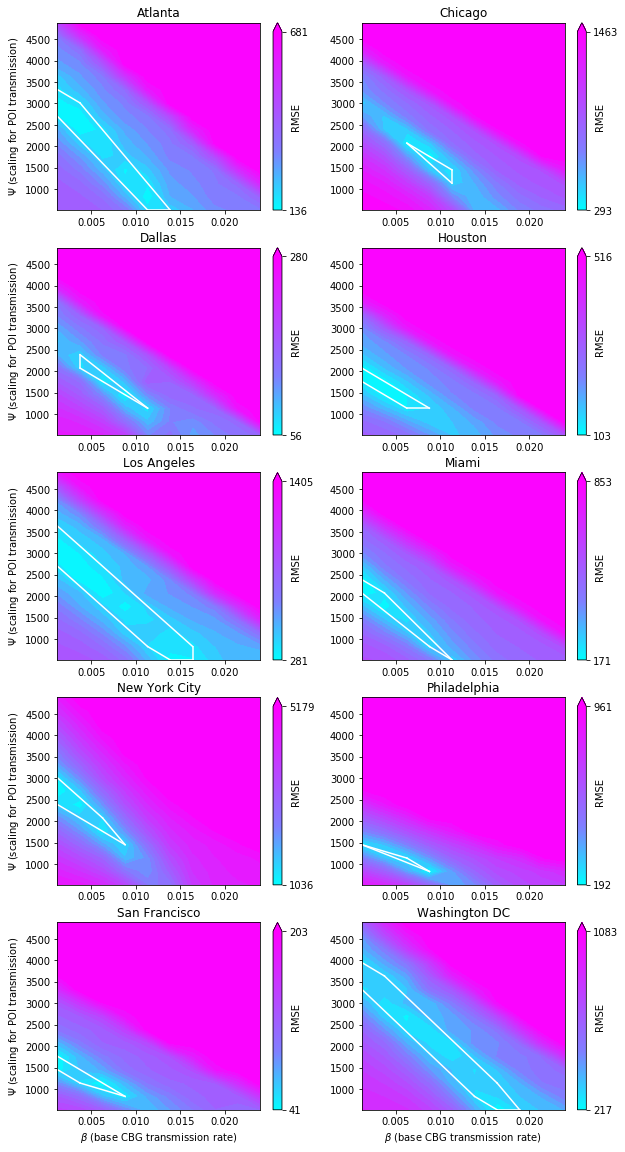

In [29]:
fig = plt.figure(figsize=[10, 20]) 
make_contour_plot = True
key_to_sort_by = 'loss_dict_daily_cases_RMSE'
metric = 'RMSE'
min_threshold = None
make_identifiability_plot(fig, all_results_for_identifiability_plot, make_contour_plot, 
                          key_to_sort_by, metric, min_threshold=min_threshold, plot_ratio=False)

Atlanta_Sandy_Springs_Roswell_GA
Indices of models with five lowest losses: [ 0  6 13  2 10]. Min loss = 14.3321.
Chicago_Naperville_Elgin_IL_IN_WI
Indices of models with five lowest losses: [0 4 2 1 3]. Min loss = 59.9846.
Dallas_Fort_Worth_Arlington_TX
Indices of models with five lowest losses: [0 1 2 7 5]. Min loss = 19.7132.
Houston_The_Woodlands_Sugar_Land_TX
Indices of models with five lowest losses: [ 0  2 12  1  4]. Min loss = 24.7037.
Los_Angeles_Long_Beach_Anaheim_CA
Indices of models with five lowest losses: [0 4 1 3 5]. Min loss = 35.9263.
Miami_Fort_Lauderdale_West_Palm_Beach_FL
Indices of models with five lowest losses: [ 0  3  2  4 13]. Min loss = 39.5372.
New_York_Newark_Jersey_City_NY_NJ_PA
Indices of models with five lowest losses: [0 2 1 6 3]. Min loss = 194.0022.
Philadelphia_Camden_Wilmington_PA_NJ_DE_MD
Indices of models with five lowest losses: [0 1 2 3 4]. Min loss = 33.6869.
San_Francisco_Oakland_Hayward_CA
Indices of models with five lowest losses: [0 3 1 2 8]

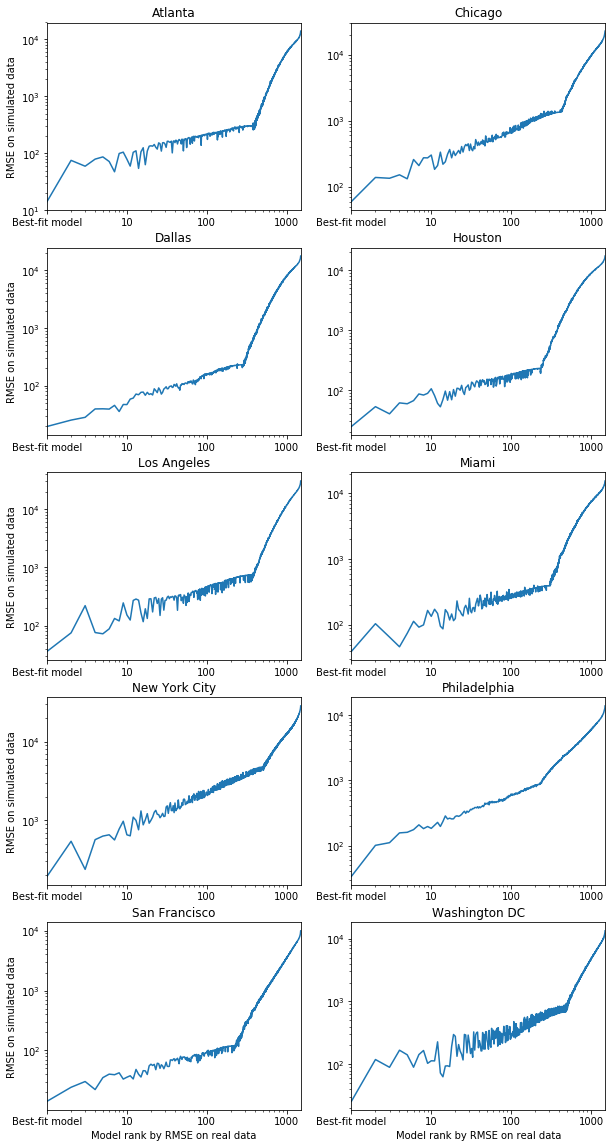

In [30]:
fig = plt.figure(figsize=[10, 20]) 
make_contour_plot = False
key_to_sort_by = 'loss_dict_daily_cases_RMSE'
metric = 'RMSE'
min_threshold = None
make_identifiability_plot(fig, all_results_for_identifiability_plot, make_contour_plot, 
                          key_to_sort_by, metric, min_threshold=min_threshold, plot_ratio=False)

In [35]:
best_models = get_best_models_for_all_msas(non_ablation_df, 'loss_dict_daily_cases_RMSE')
params = ['home_beta', 'poi_psi', 'p_sick_at_t0']
table_df = pd.DataFrame(columns=['MSA', '# models within RMSE threshold'] + params)
for msa in MSAS:
    msa_df = best_models[best_models.MSA_name == msa].sort_values(by='loss_dict_daily_cases_RMSE')
    model_dict = {}
    model_dict['MSA'] = MSAS_TO_PRETTY_NAMES[msa]
    model_dict['# models within RMSE threshold'] = len(msa_df)
    for p in params:
        if p == 'home_beta':
            fmt_string = '%2.3f (%2.3f, %2.3f)'
        elif p == 'poi_psi':
            fmt_string = '%i (%i, %i)'
        else:
            fmt_string = "%2.0e (%2.0e, %2.0e)"
        model_dict[p] = fmt_string % (msa_df.iloc[0][p], 
                                      np.min(msa_df[p].values), 
                                      np.max(msa_df[p].values))        
    table_df = table_df.append(model_dict, ignore_index=True)
table_df

Finding best fit models based on key=loss_dict_daily_cases_RMSE, loss tolerance=1.200


MSA # models within RMSE threshold             home_beta  \
0        Atlanta                             16  0.004 (0.001, 0.014)   
1        Chicago                              4  0.009 (0.006, 0.011)   
2         Dallas                              5  0.009 (0.004, 0.011)   
3        Houston                              8  0.001 (0.001, 0.009)   
4    Los Angeles                             25  0.006 (0.001, 0.016)   
5          Miami                              7  0.001 (0.001, 0.011)   
6  New York City                              7  0.001 (0.001, 0.009)   
7   Philadelphia                              3  0.009 (0.001, 0.009)   
8  San Francisco                              5  0.006 (0.001, 0.009)   
9  Washington DC                             17  0.016 (0.001, 0.019)   

             poi_psi          p_sick_at_t0  
0   2388 (515, 3325)  5e-04 (1e-04, 2e-03)  
1  1764 (1139, 2076)  2e-04 (2e-04, 5e-04)  
2  1452 (1139, 2388)  2e-04 (1e-04, 2e-04)  
3  2076 (1139, 2076)  2e-04 (1e-04, 5e-04)  
4   2076 (515, 3637)  2e-04 (2e-05, 1e-03)  
5   2388 (515, 2388)  2e-04 (2e-04, 2e-03)  
6  2700 (1452, 3013)  1e-04 (5e-05, 1e-03)  
7    827 (827, 1452)  5e-04 (1e-04, 5e-04)  
8   1139 (827, 1764)  5e-04 (2e-04, 1e-03)  
9    515 (515, 3949)  5e-04 (2e-05, 5e-04)